## ECE 351 - Lab #2
#### Collin Heist, User-Defined Functions

## Introduction
The purpose of this lab is to use user-defined functions to demonstrate various signal operations like time shifting, time scaling, time reversal, signal addition, and discrete differentiation (according to the lab-sheet).

## Part 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function 1, the cos(t) function
def func1(x_vals):
    return (np.asarray([np.cos(t) for t in x_vals]))

# Generic Function to create a plot
def create_plot(x, y, xLabel="X-Values", yLabel="Y-Values", title="Plot"):
    plt.figure(figsize=(6, 4), dpi=450)
    plt.subplot(1, 1, 1)
    plt.plot(x, y)
    plt.grid(True)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    
    plt.show()

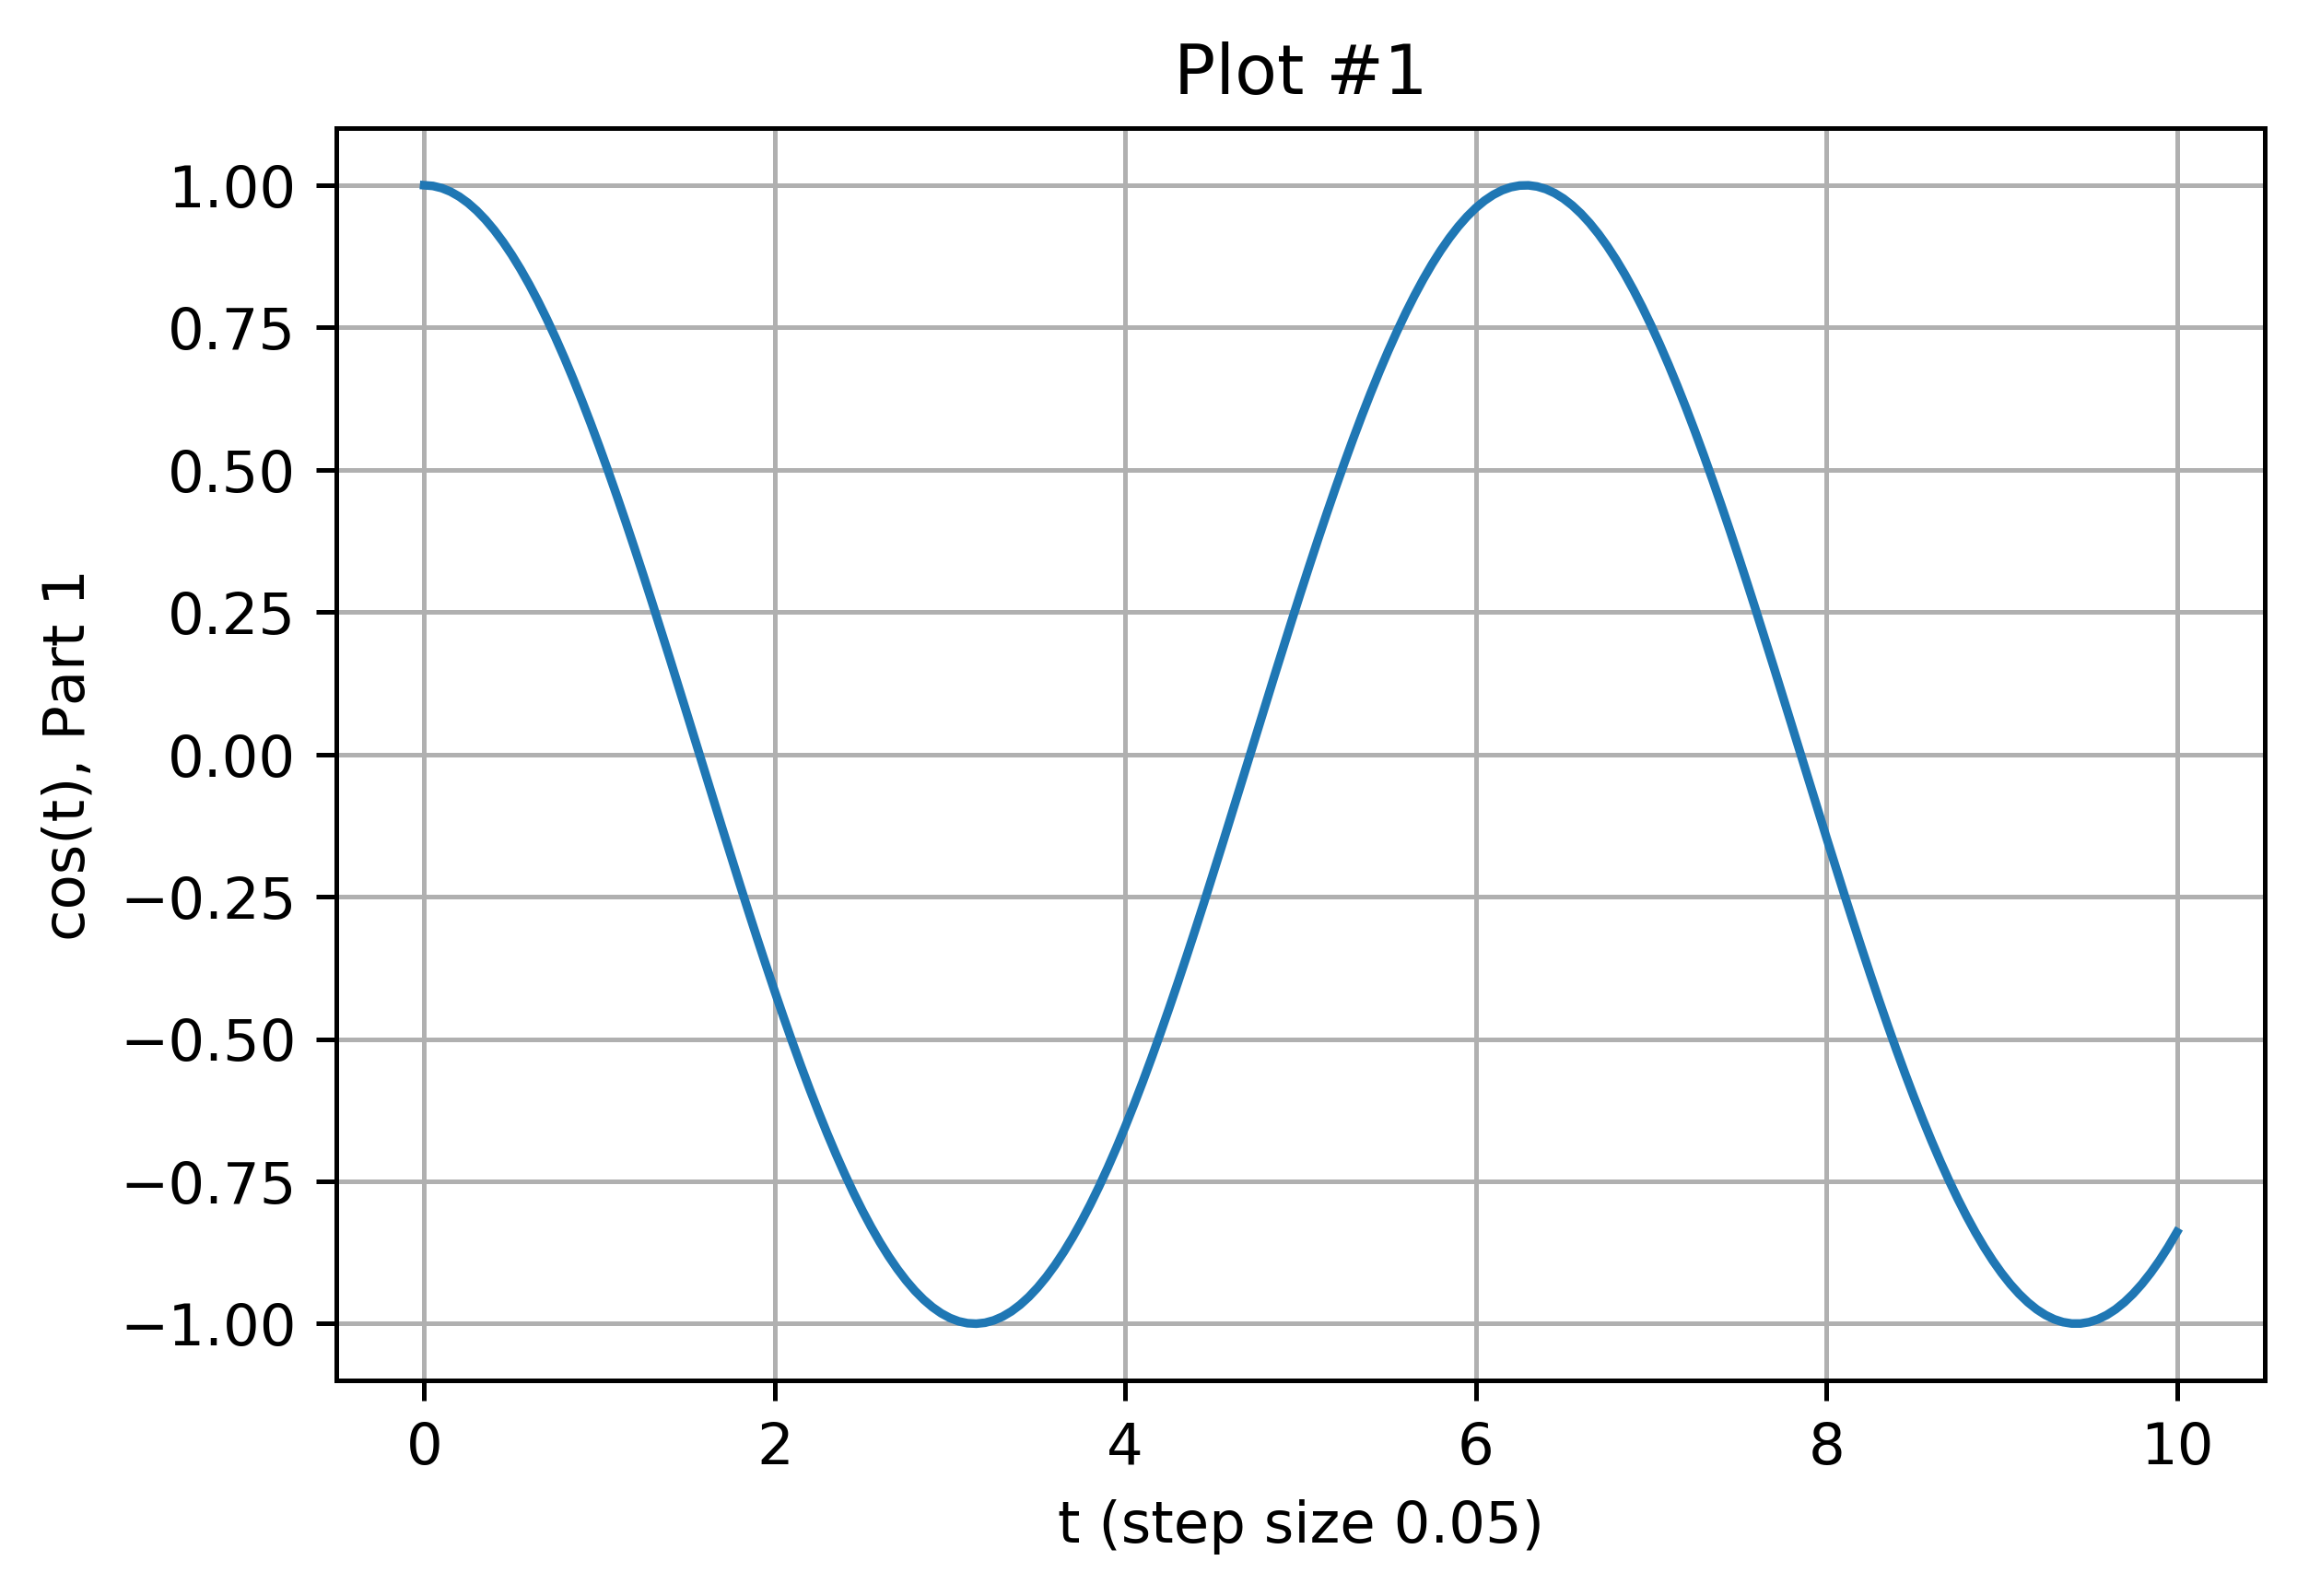

In [137]:
step_size = 0.05
t = np.arange(0, 10 + step_size, step_size)
y = func1(t)

create_plot(t, y, "t (step size 0.05)", "cos(t), Part 1", "Plot #1")

## Part 2
The equation for the plot in Part 2 is:
$$y(t)=r(t)+5u(t-3)-r(t-3)-2u(t-6)-2r(t-6)$$

In [4]:
# Definition of the ramp function
def r(x_vals, zero_val=0):
    return (np.asarray([0 if x < zero_val else (x - zero_val) for x in x_vals]))

# Defintion of the step function
def u(x_vals, zero_val=0):
    return (np.asarray([0 if x < zero_val else 1 for x in x_vals]))

# Function defintion of the handwritten equation listed above
def user_function(x_vals):
    return (r(x_vals)+5*u(x_vals, 3)-r(x_vals, 3)-2*u(x_vals, 6)-2*r(x_vals, 6))

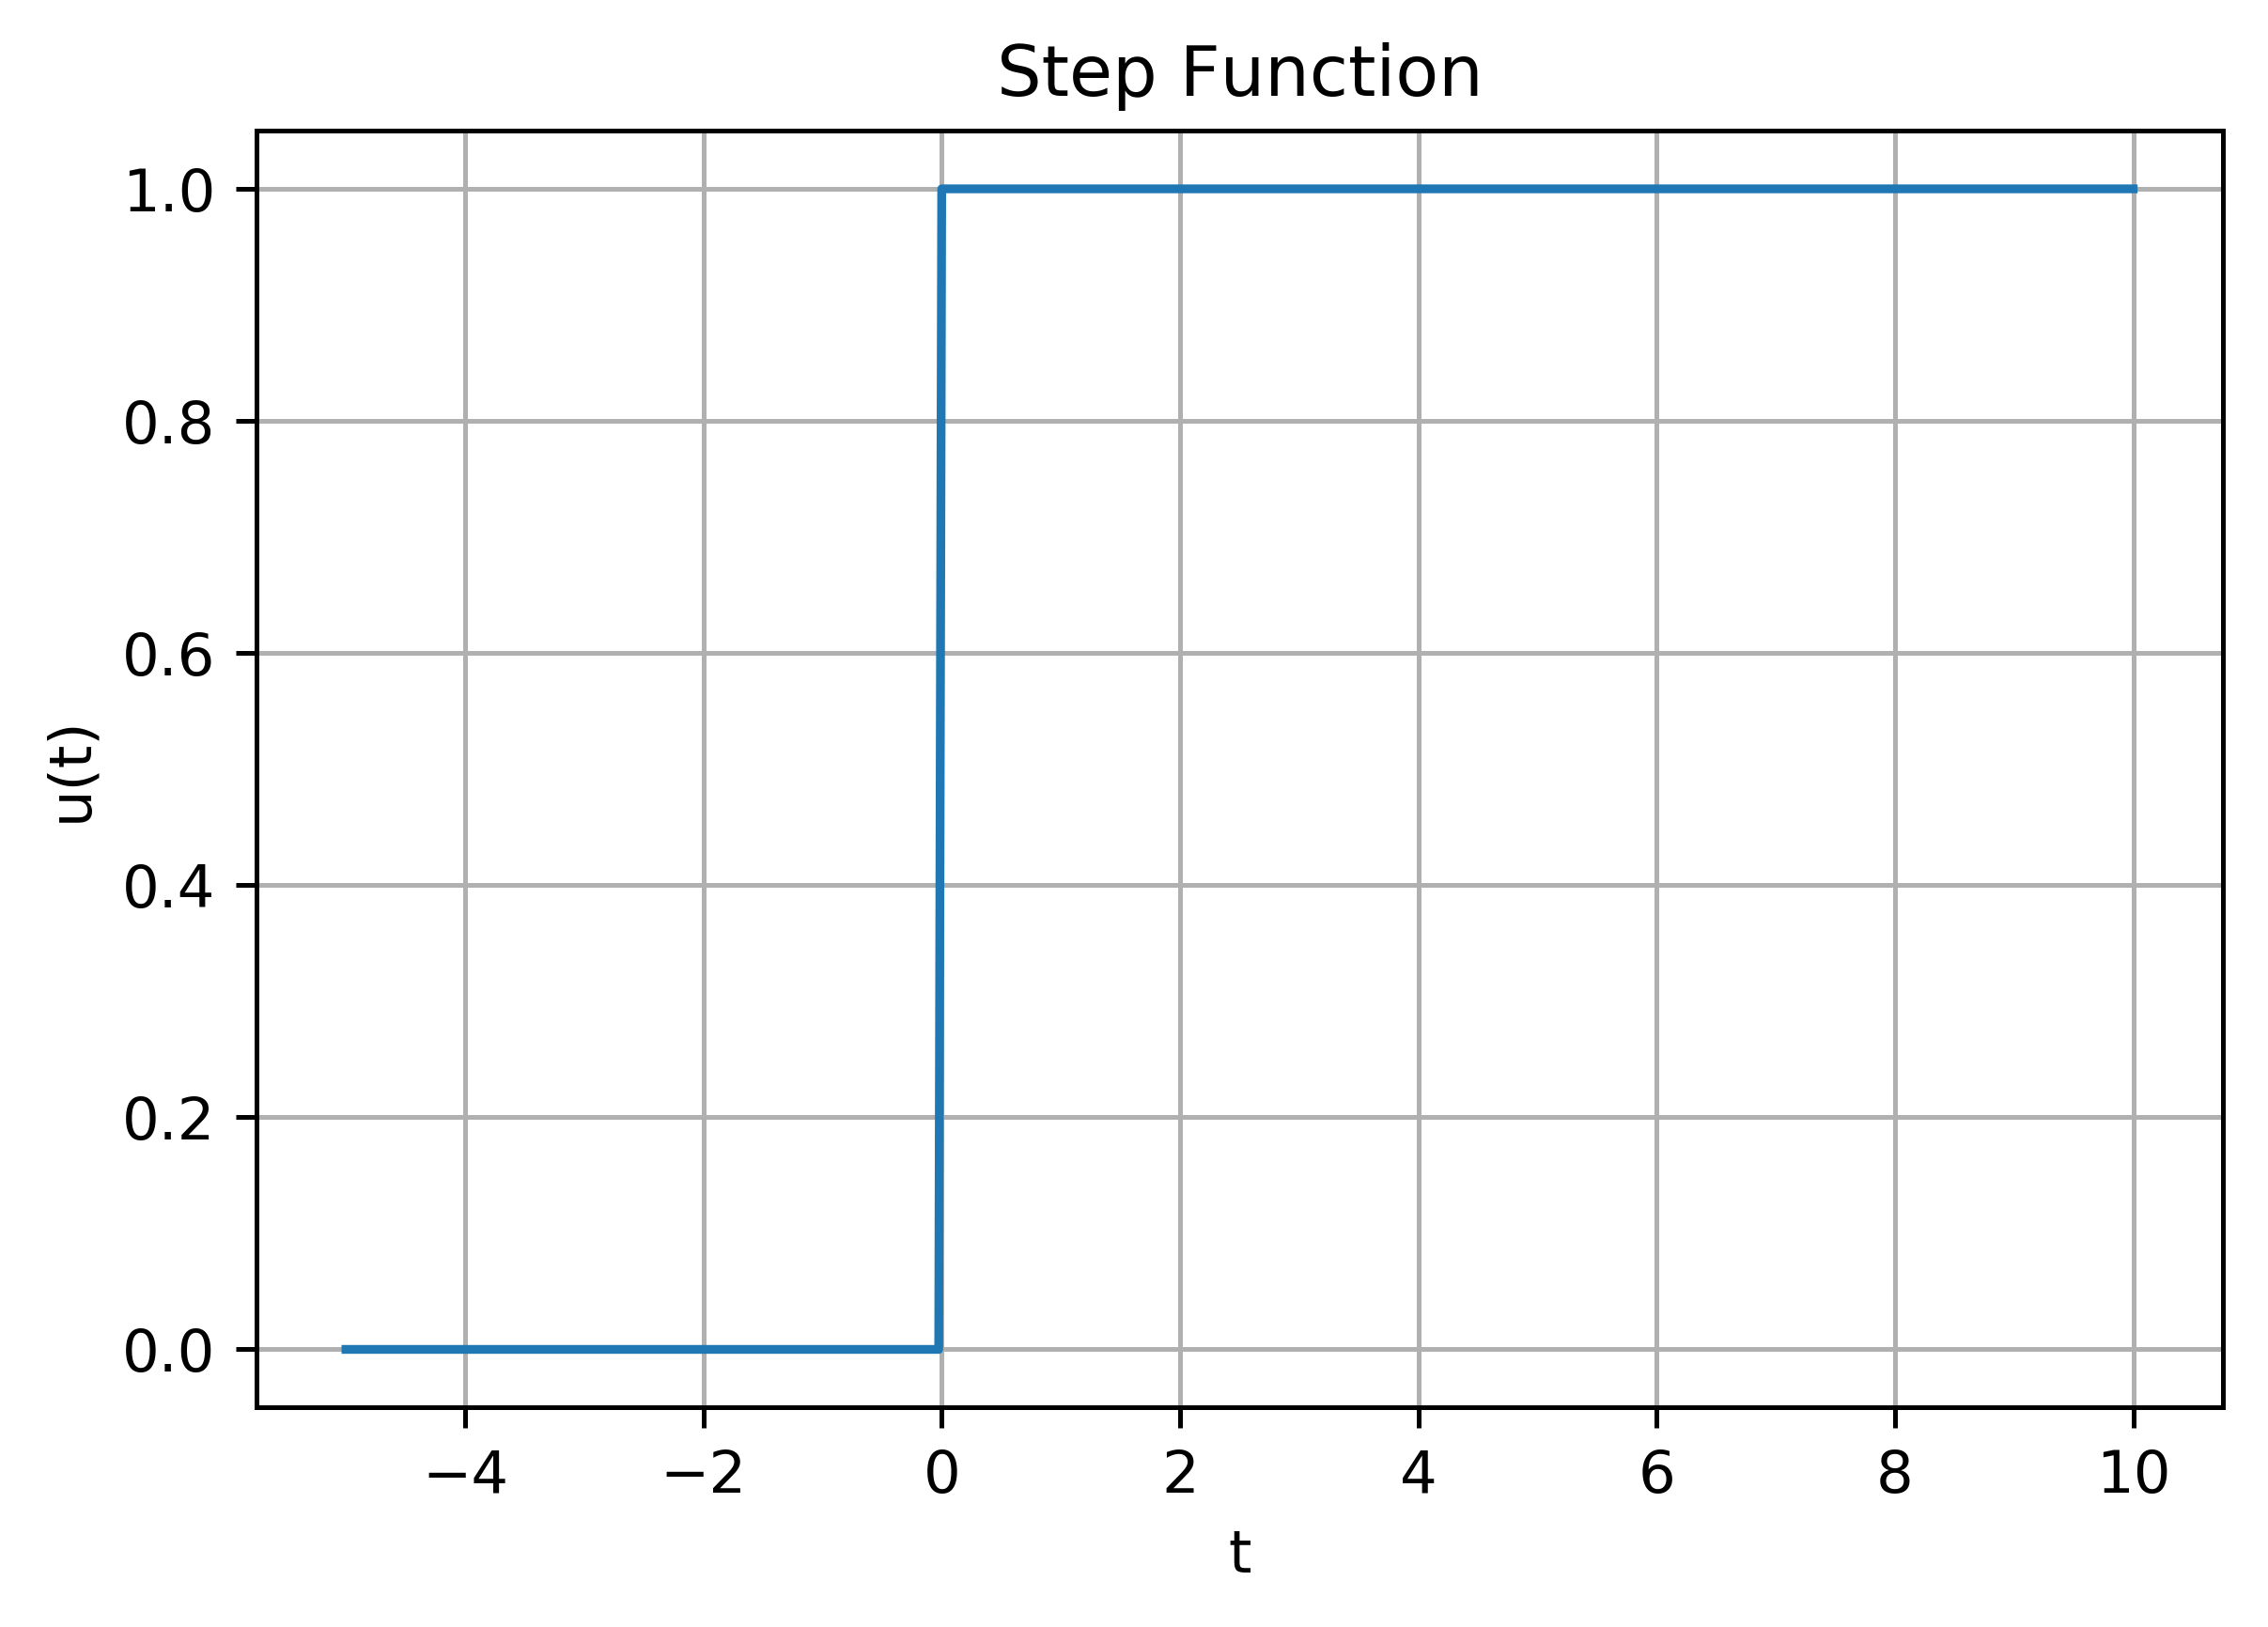

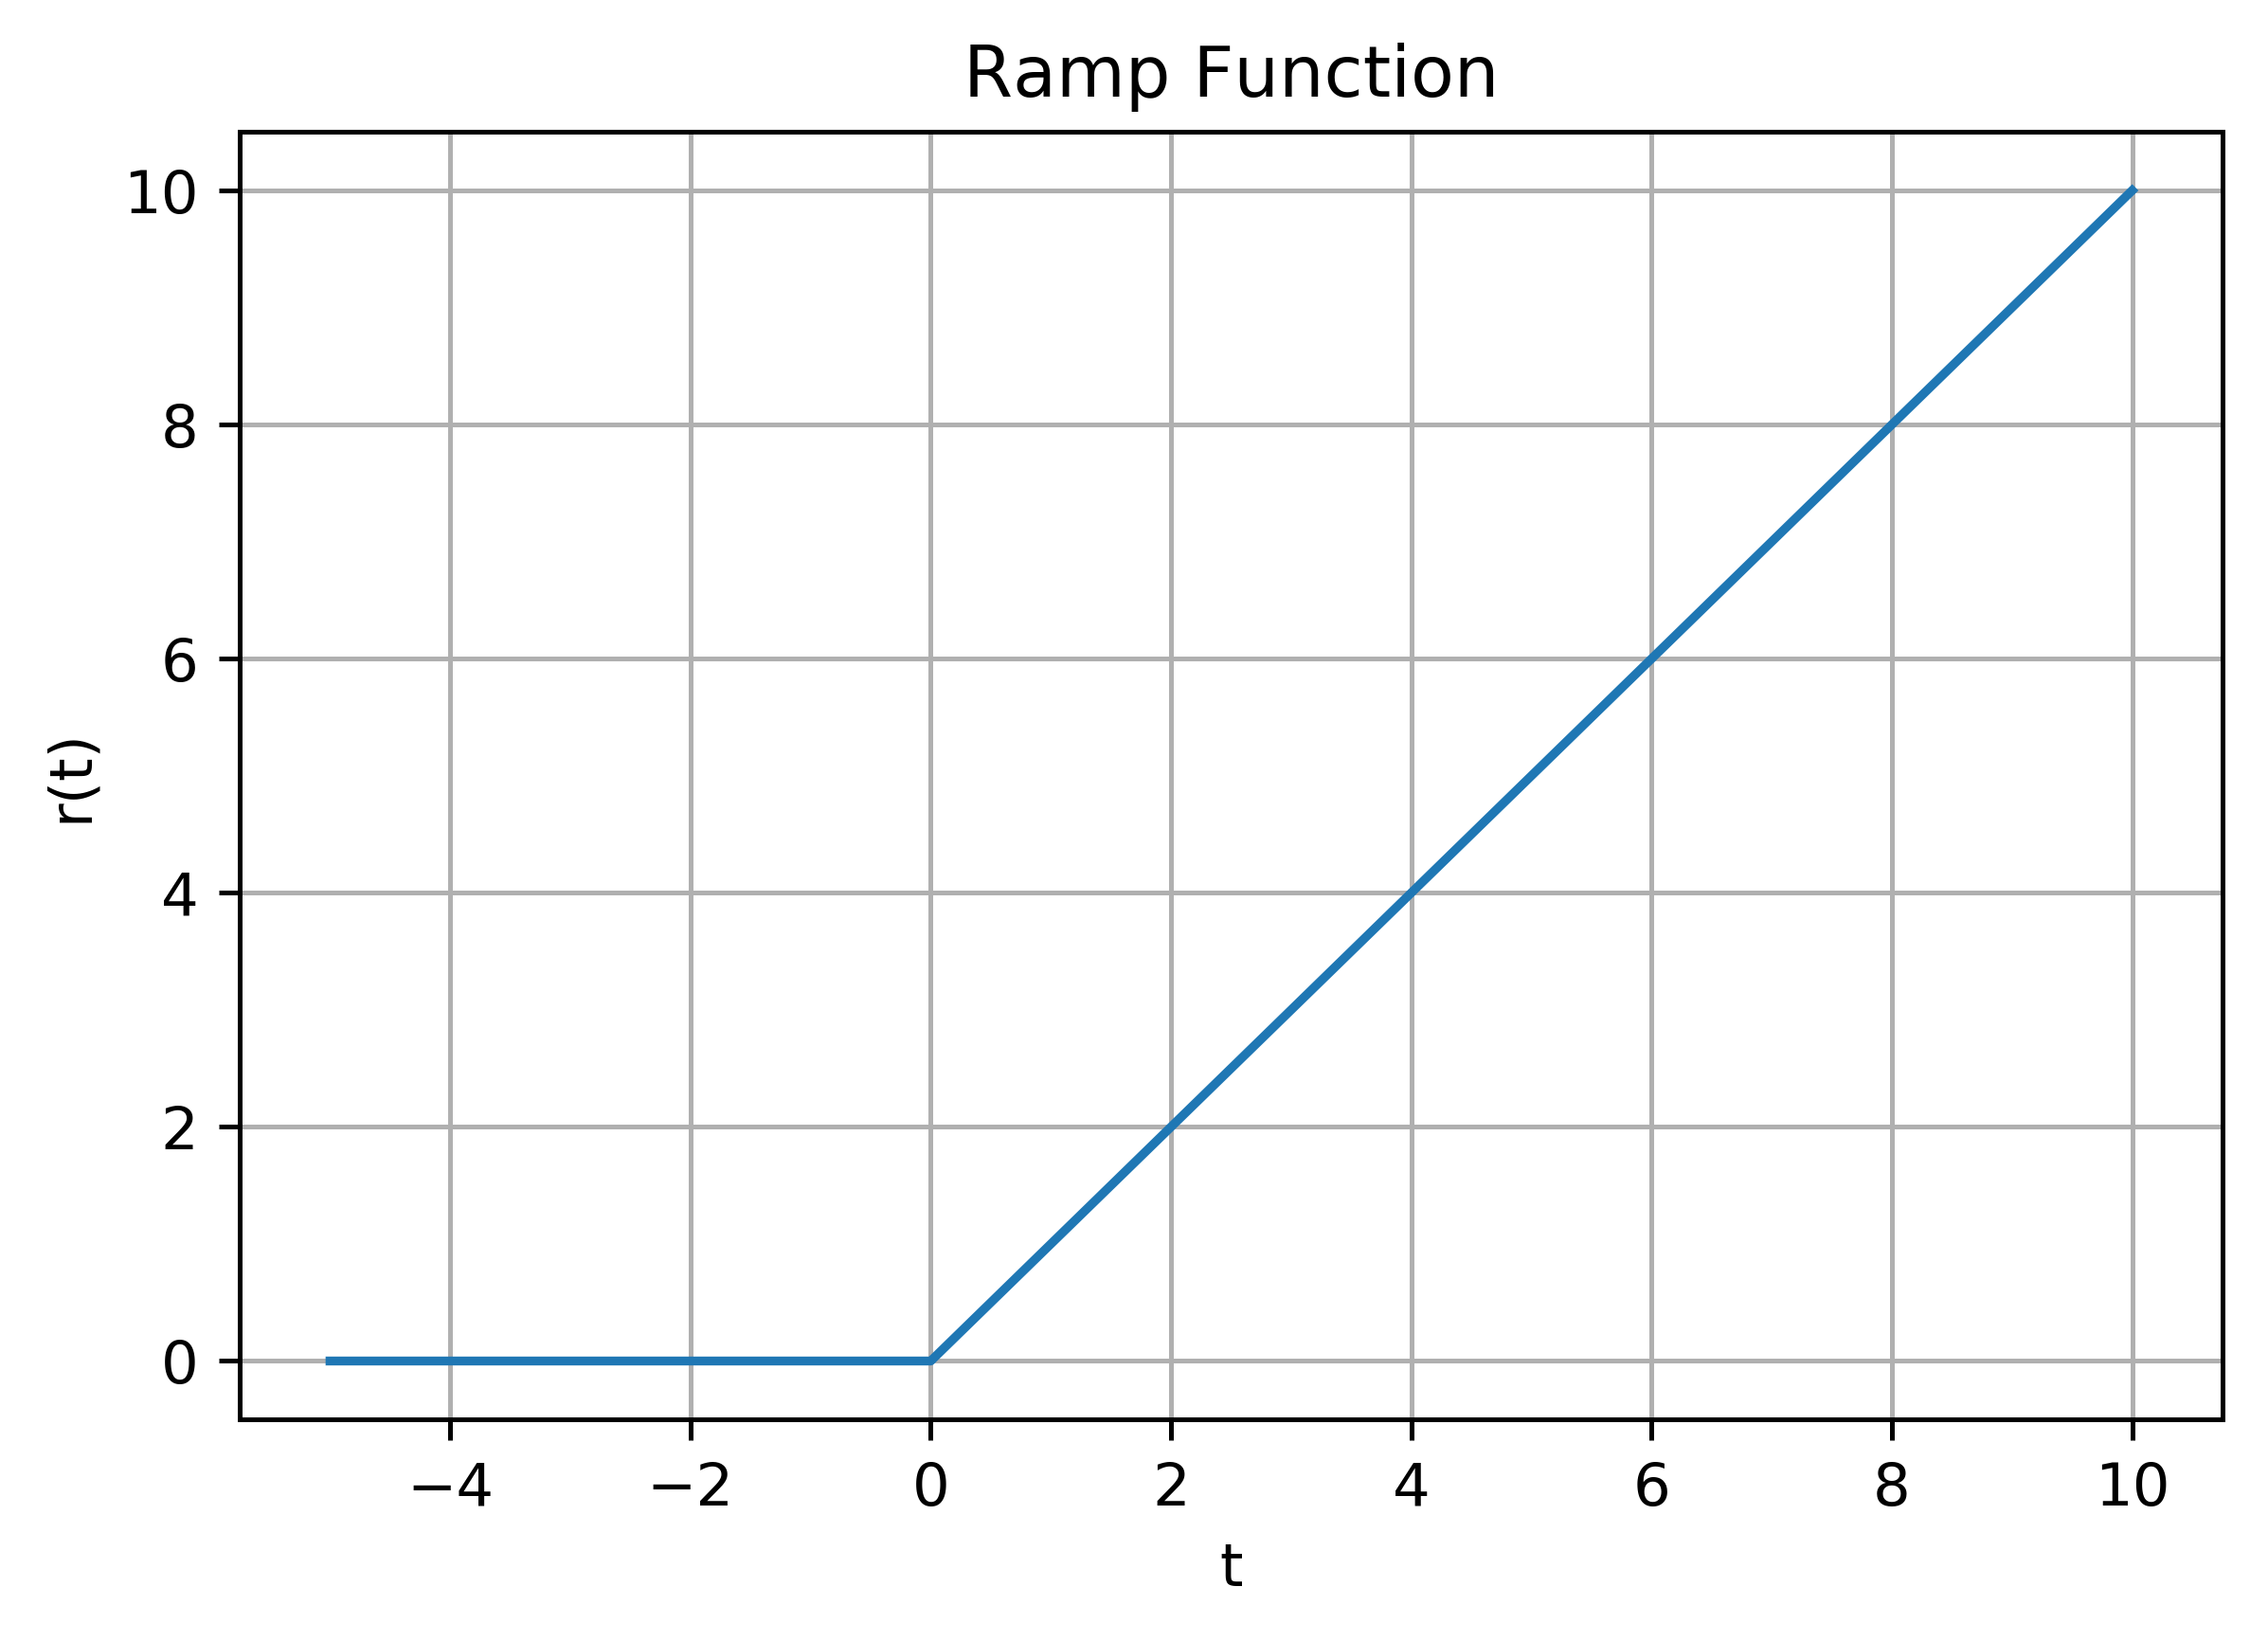

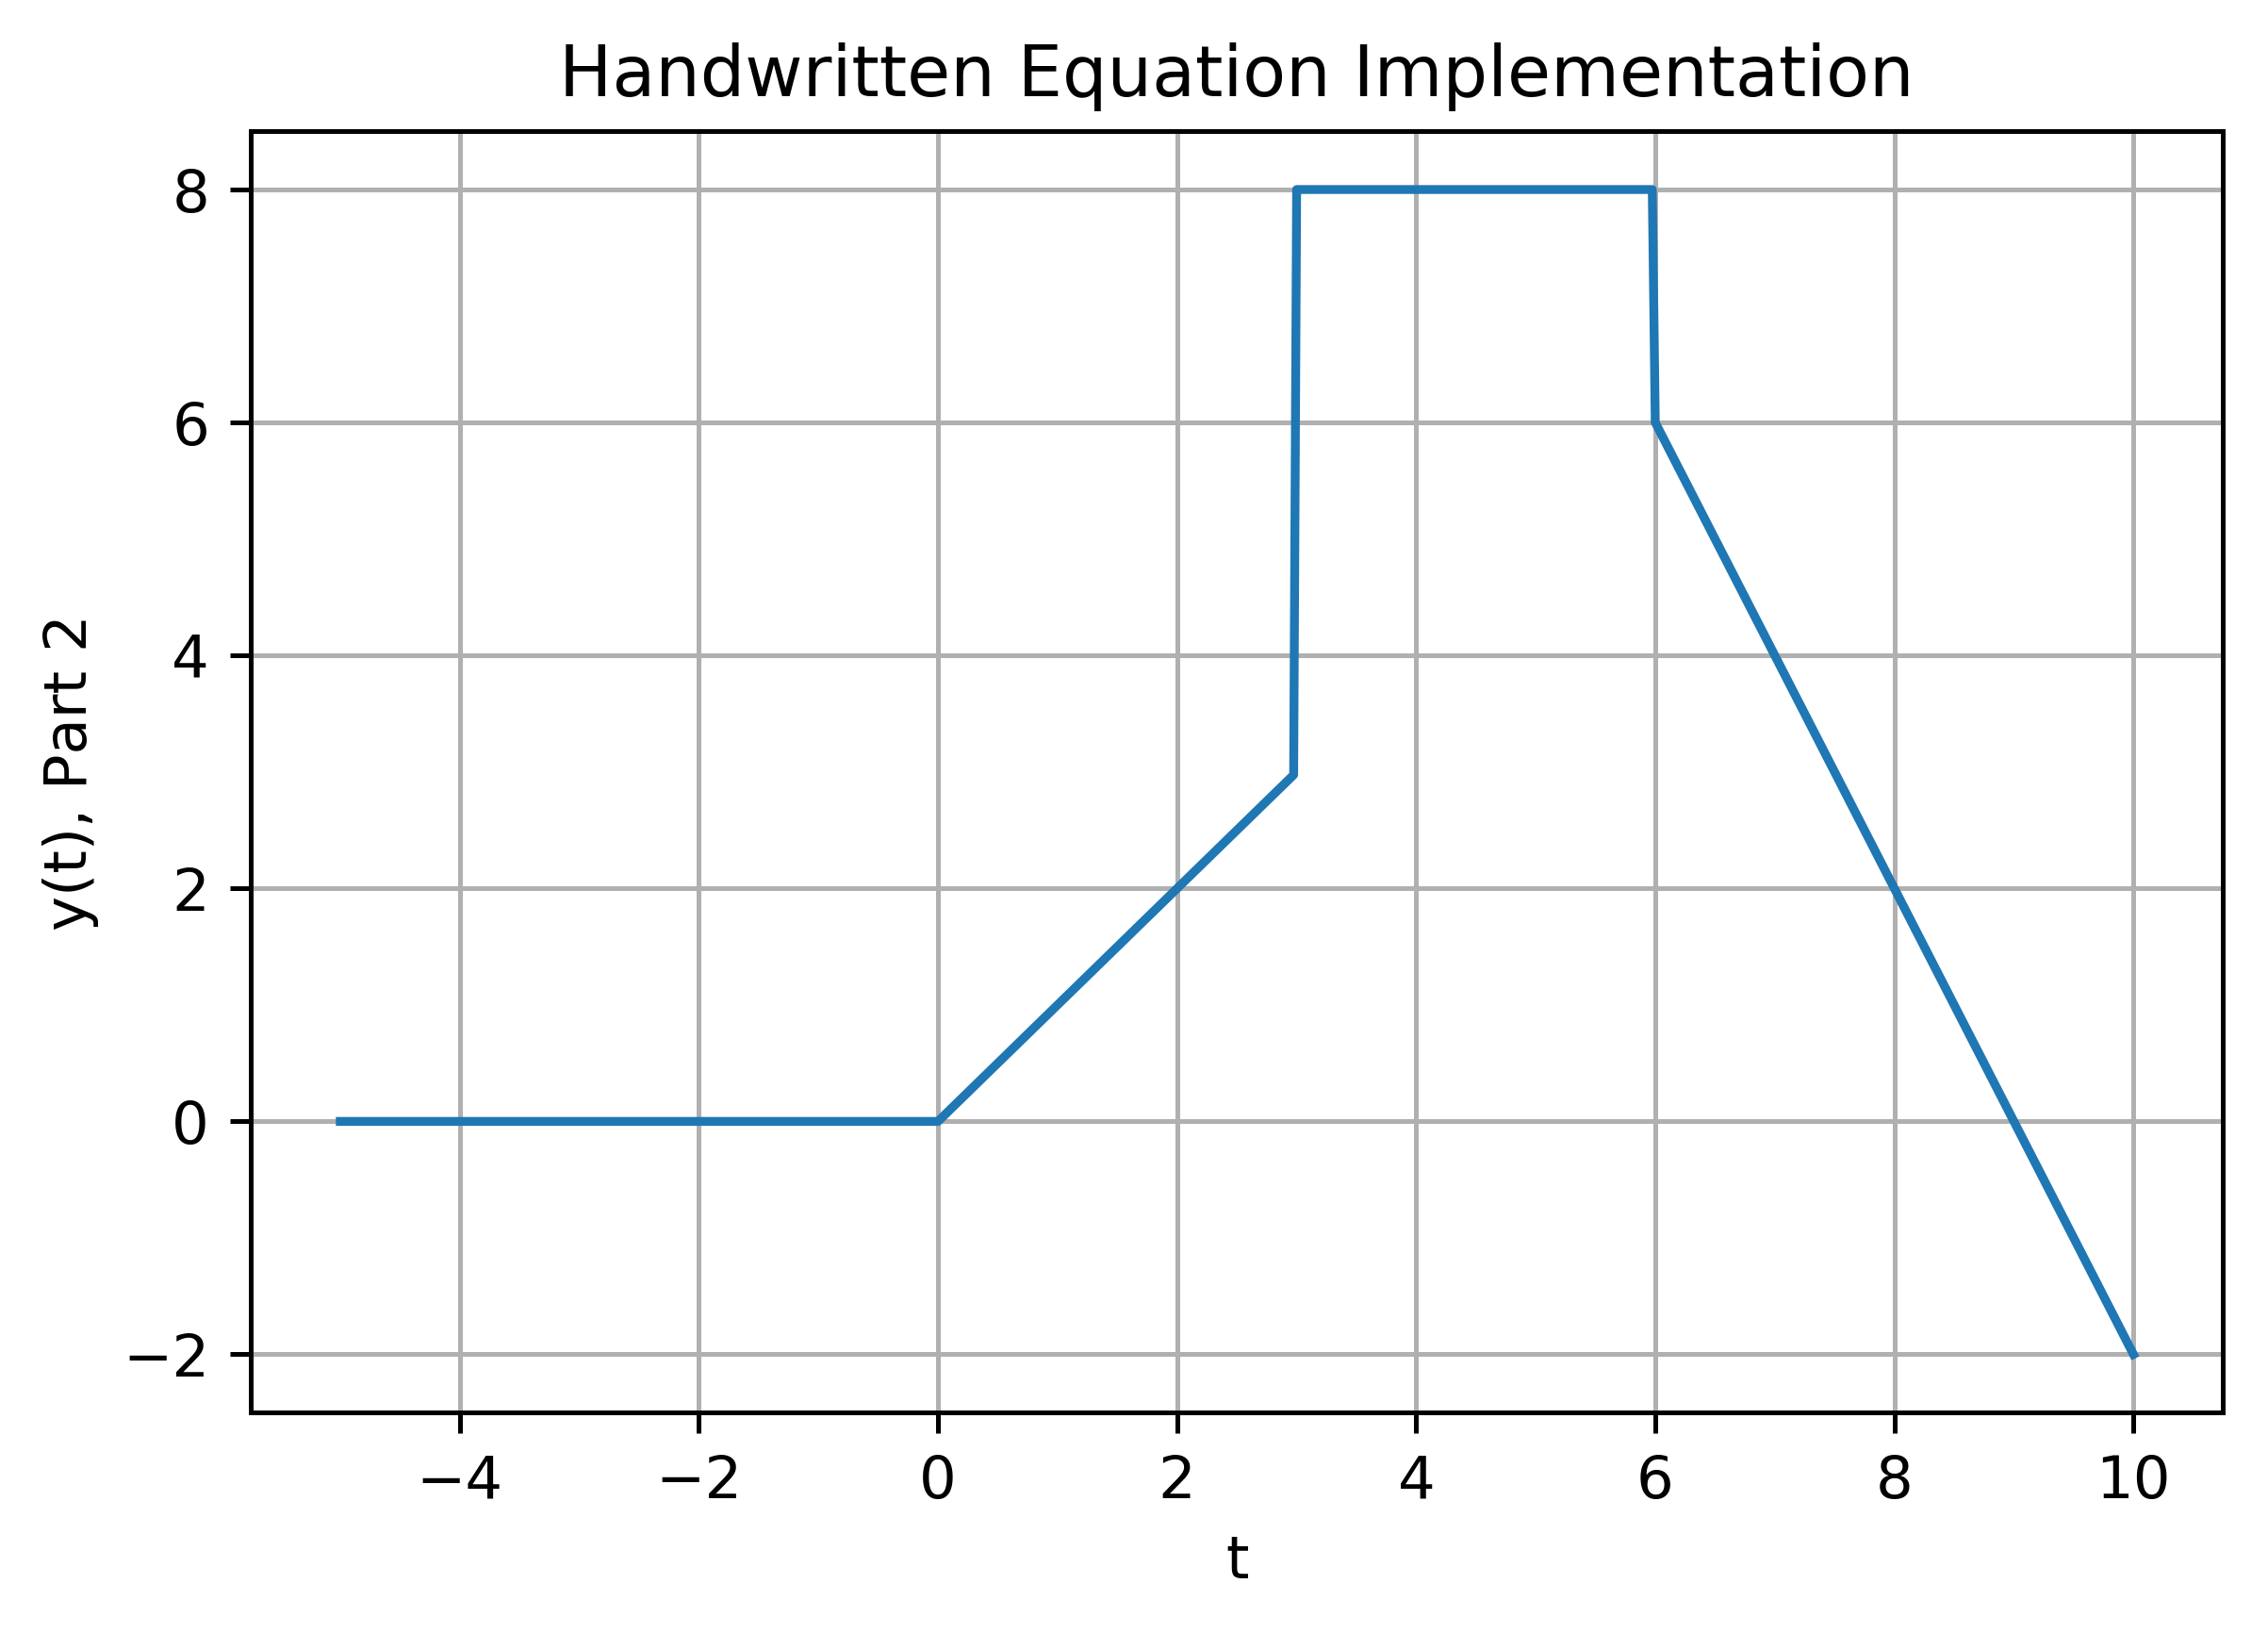

In [139]:
step_size_2 = 0.025
t_2 = np.arange(-5, 10 + step_size_2, step_size_2)
u_2 = u(t_2, 0)
r_2 = r(t_2, 0) 
y_2 = user_function(t_2)

create_plot(t_2, u_2, "t", "u(t)", "Step Function")
create_plot(t_2, r_2, "t", "r(t)", "Ramp Function")
create_plot(t_2, y_2, "t", "y(t), Part 2", "Handwritten Equation Implementation")

## Part 3
We'll be using the predefined function from Part 2, and applying the transformations of y(t-4) and y(-t-4) and then plotting the results

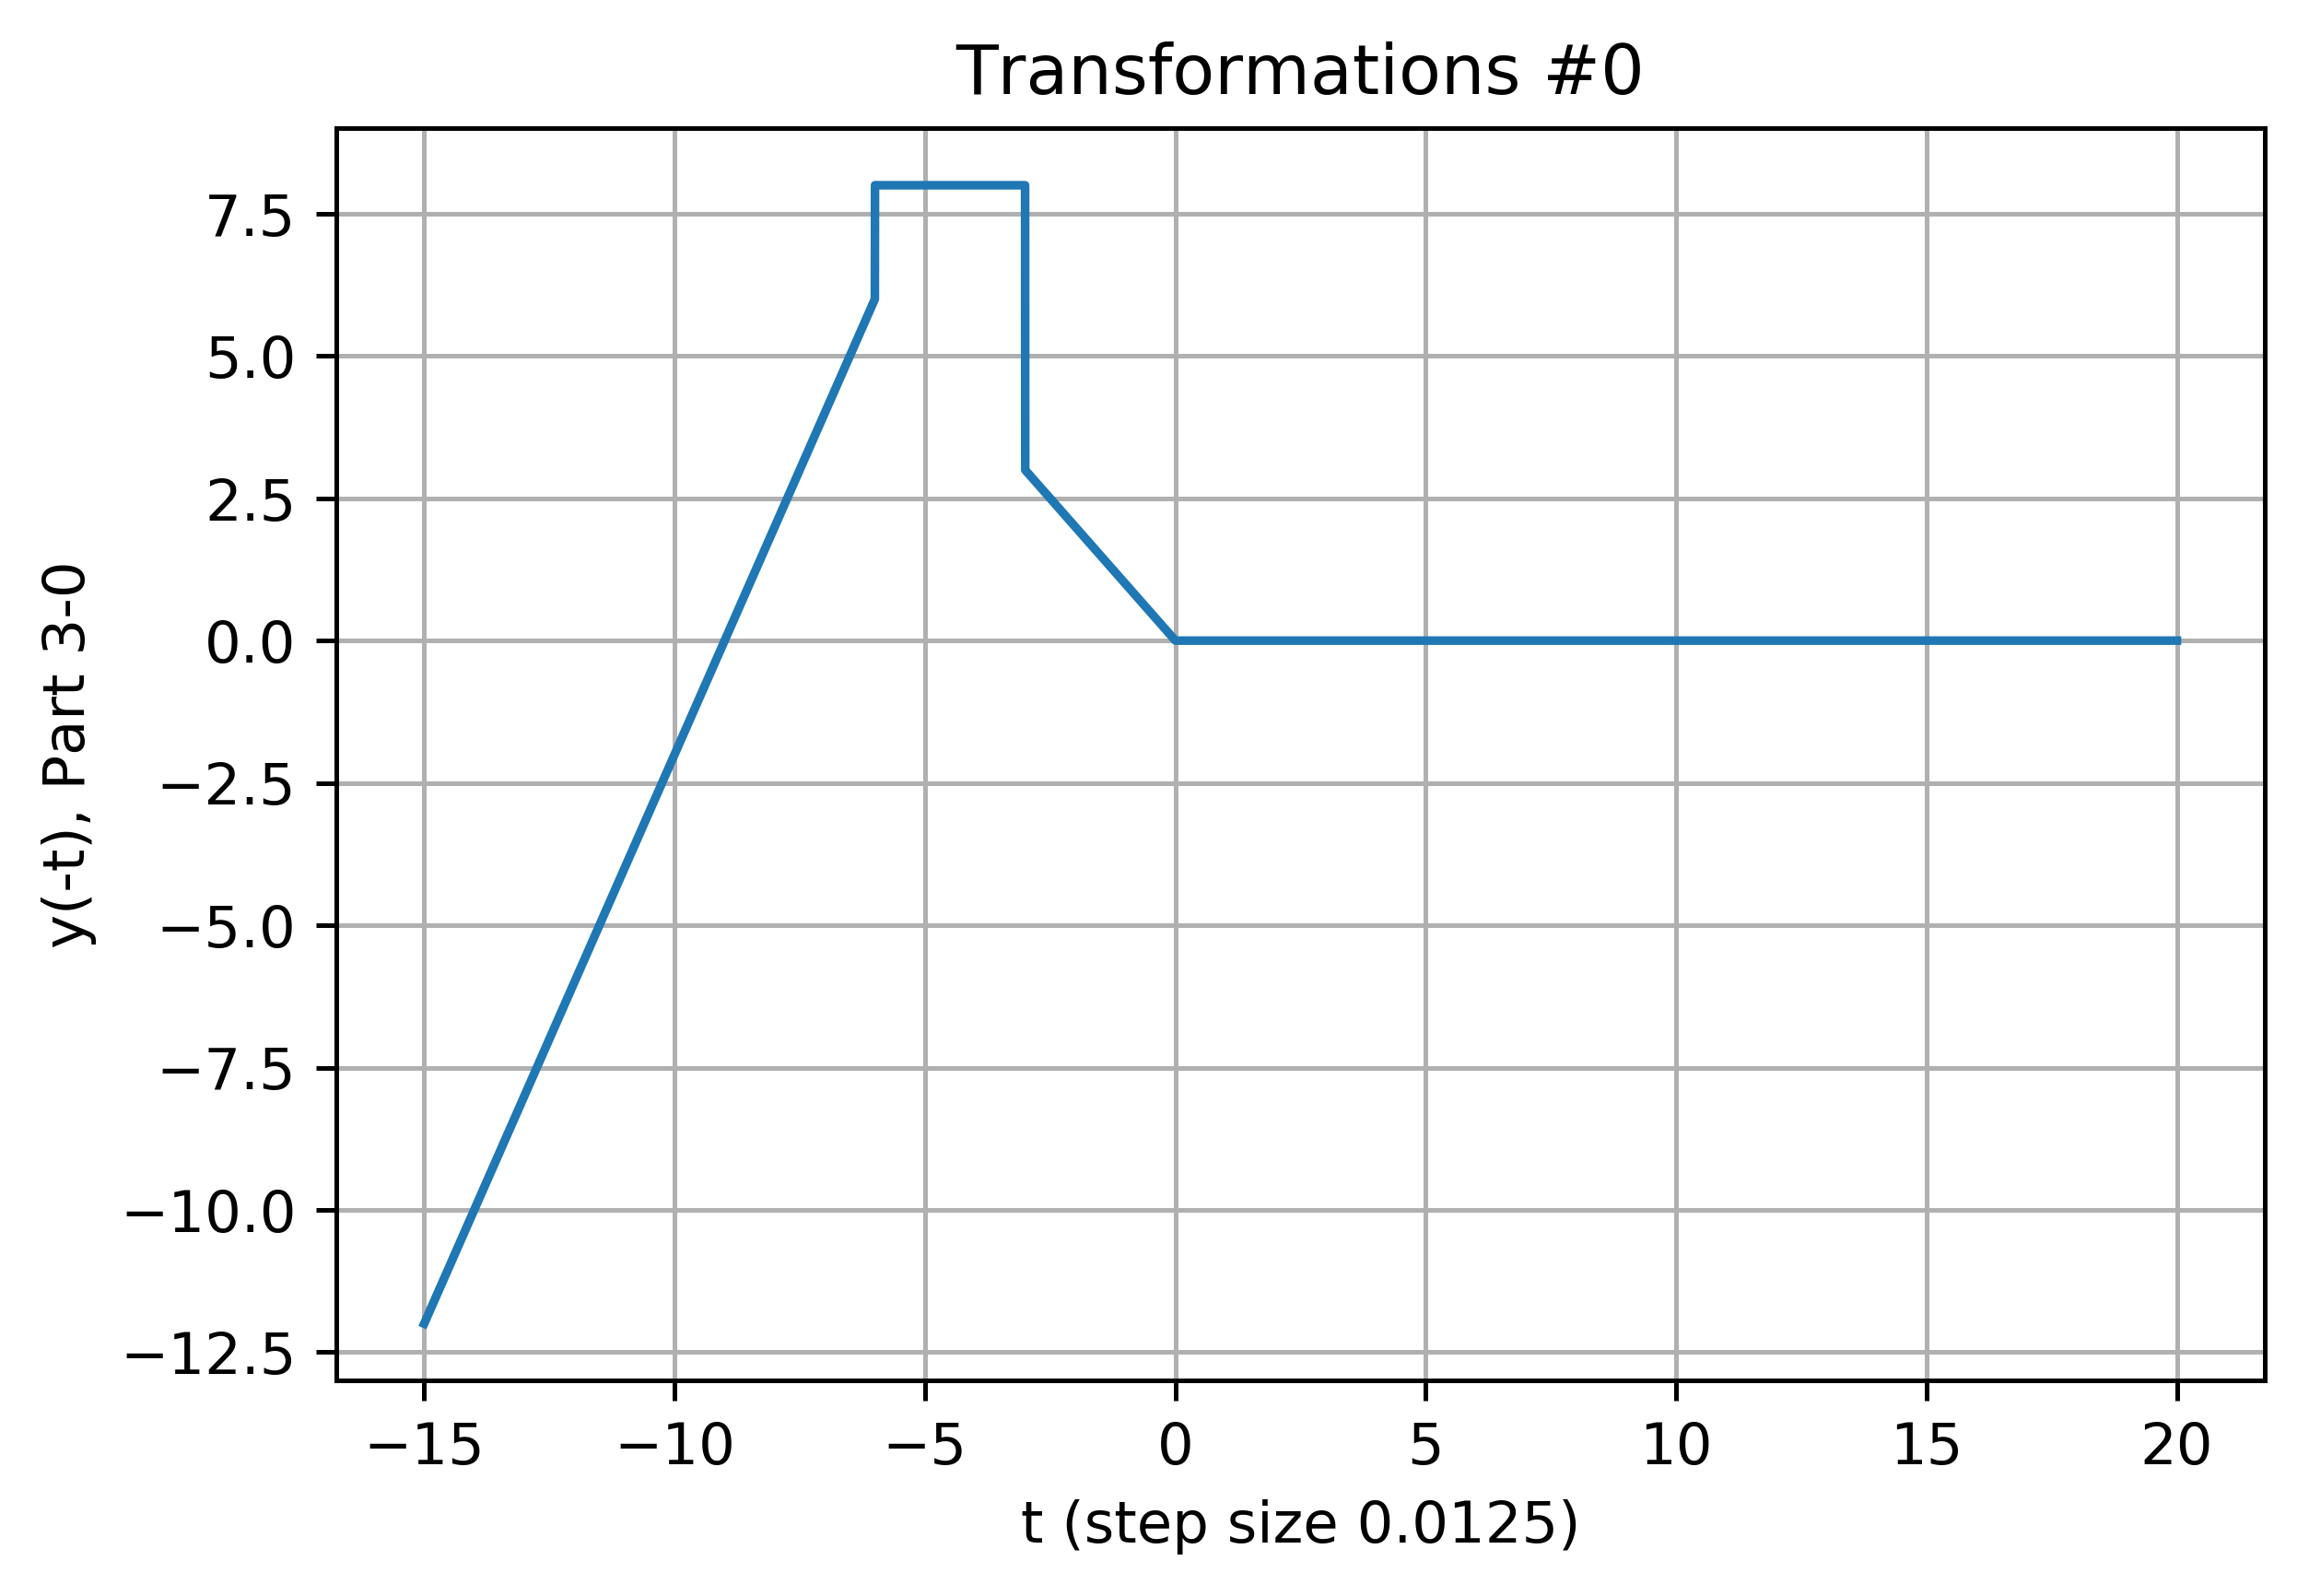

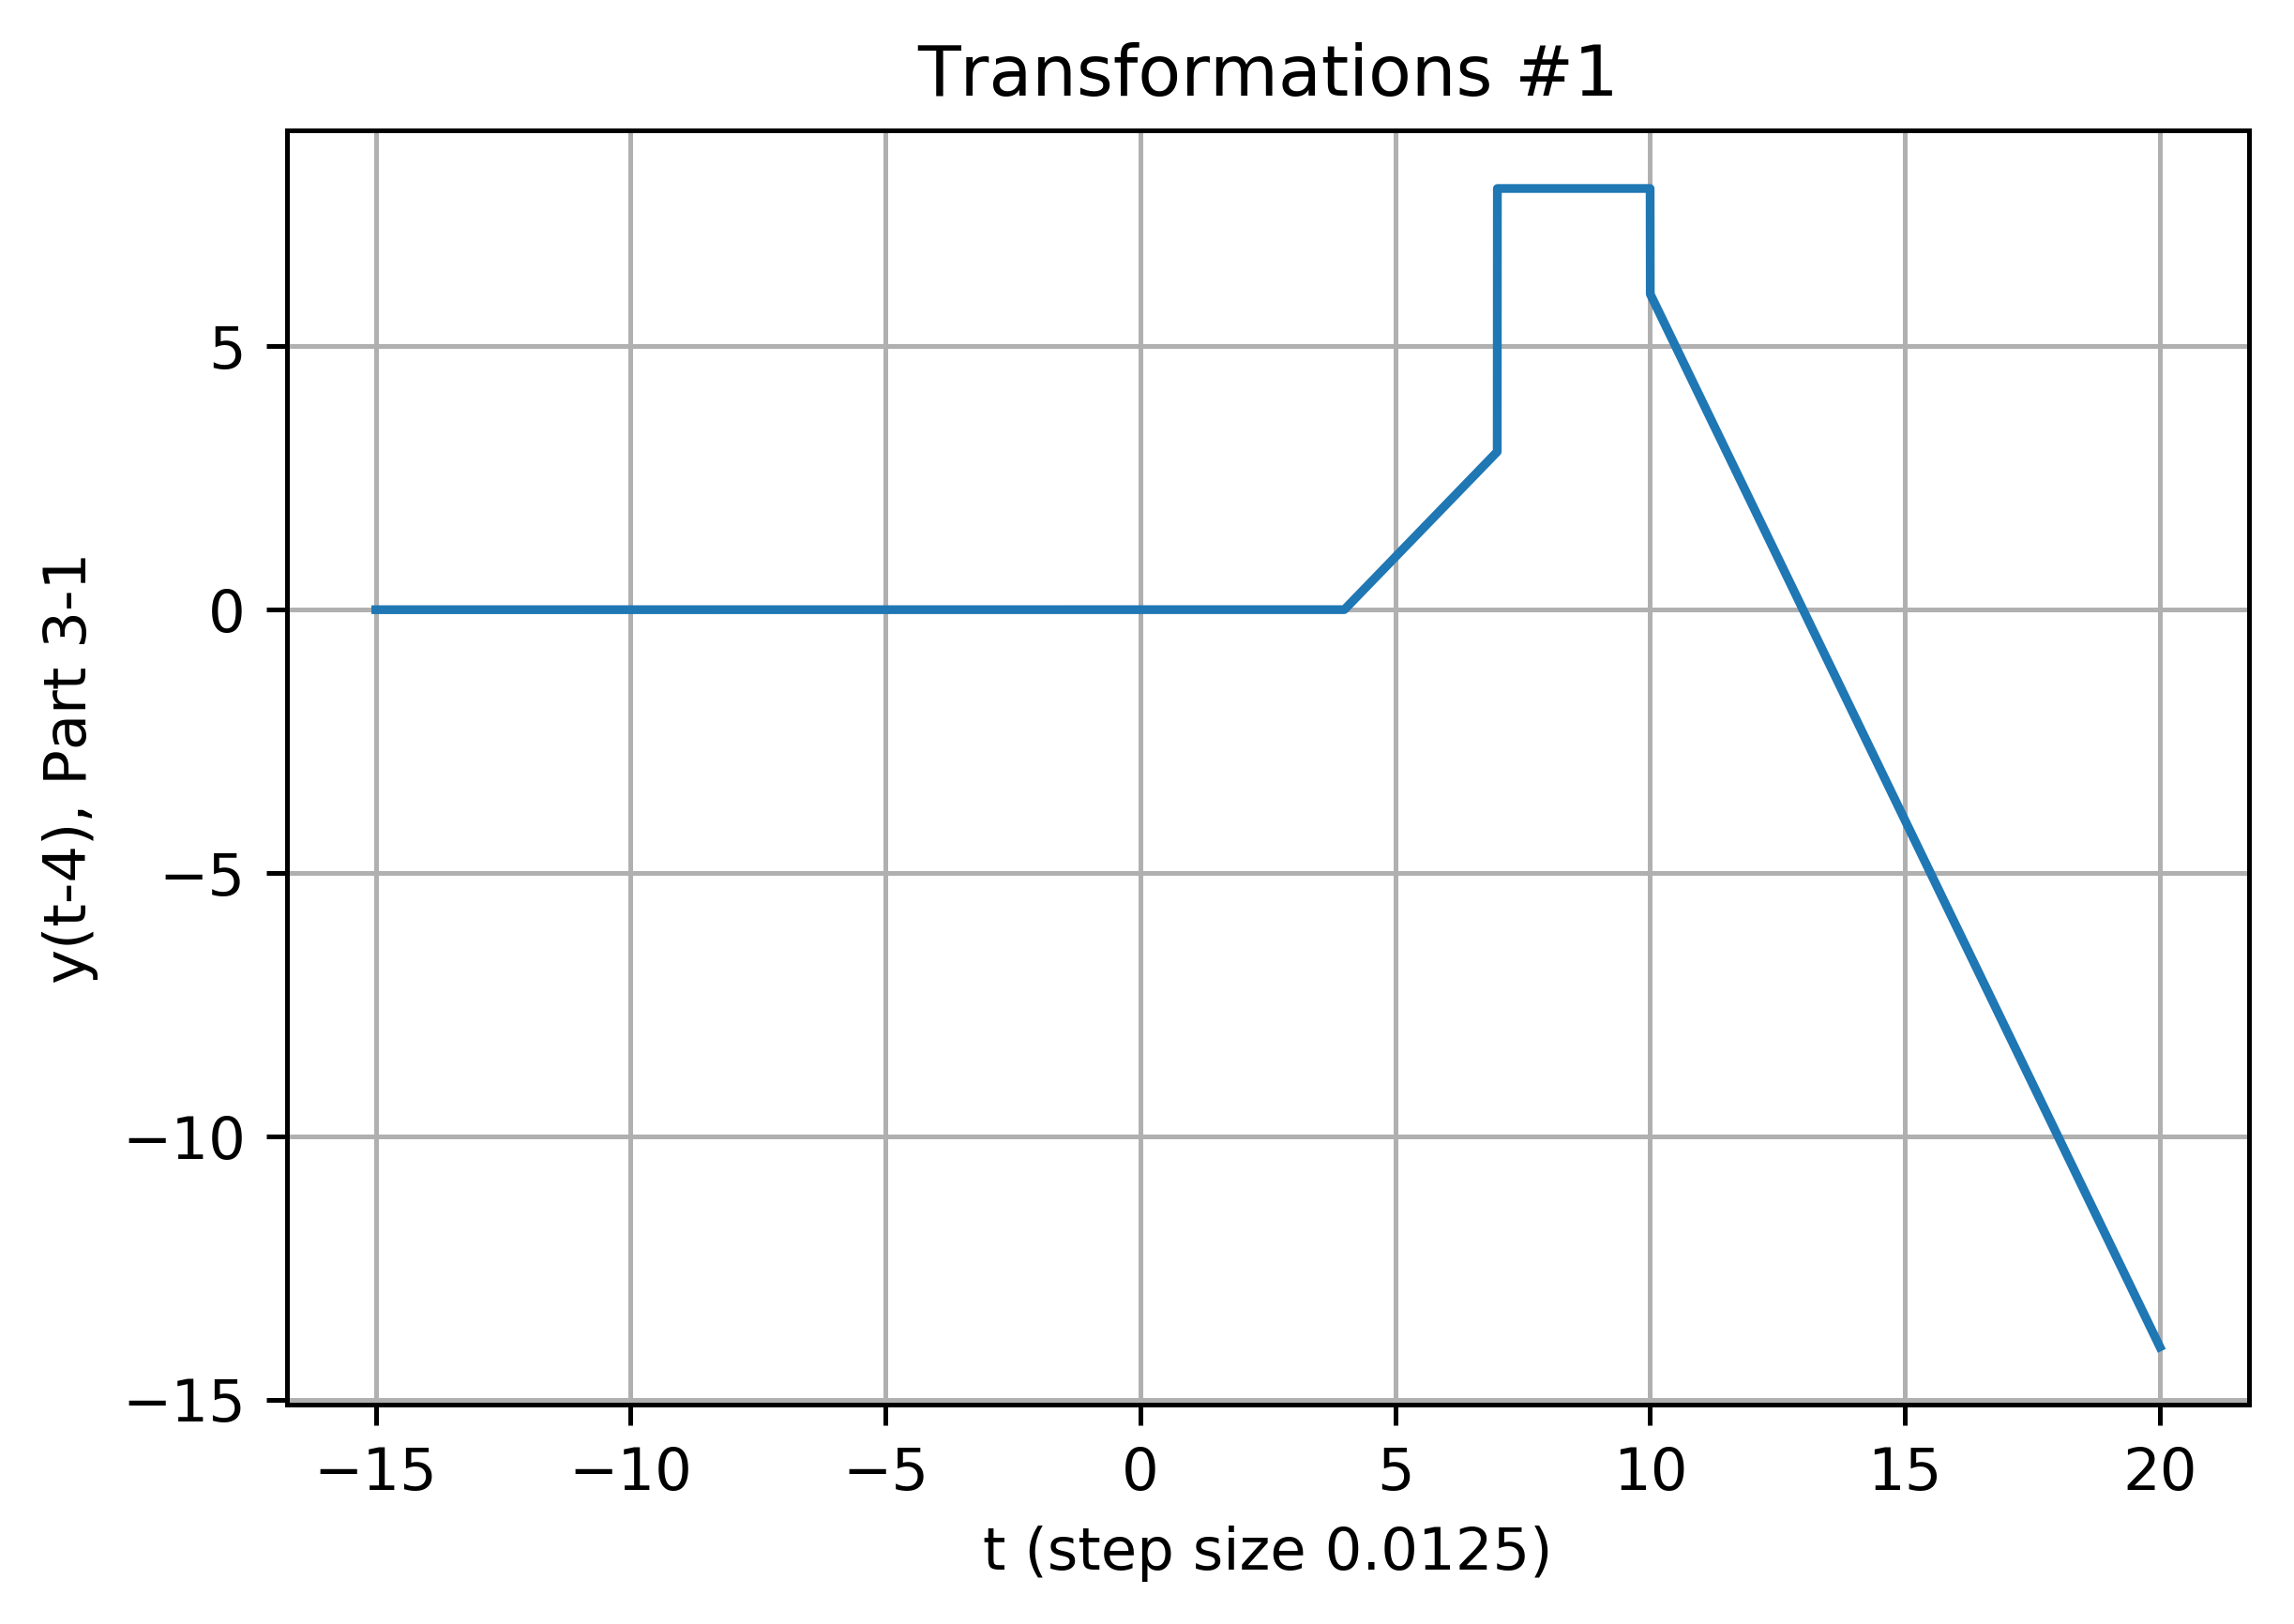

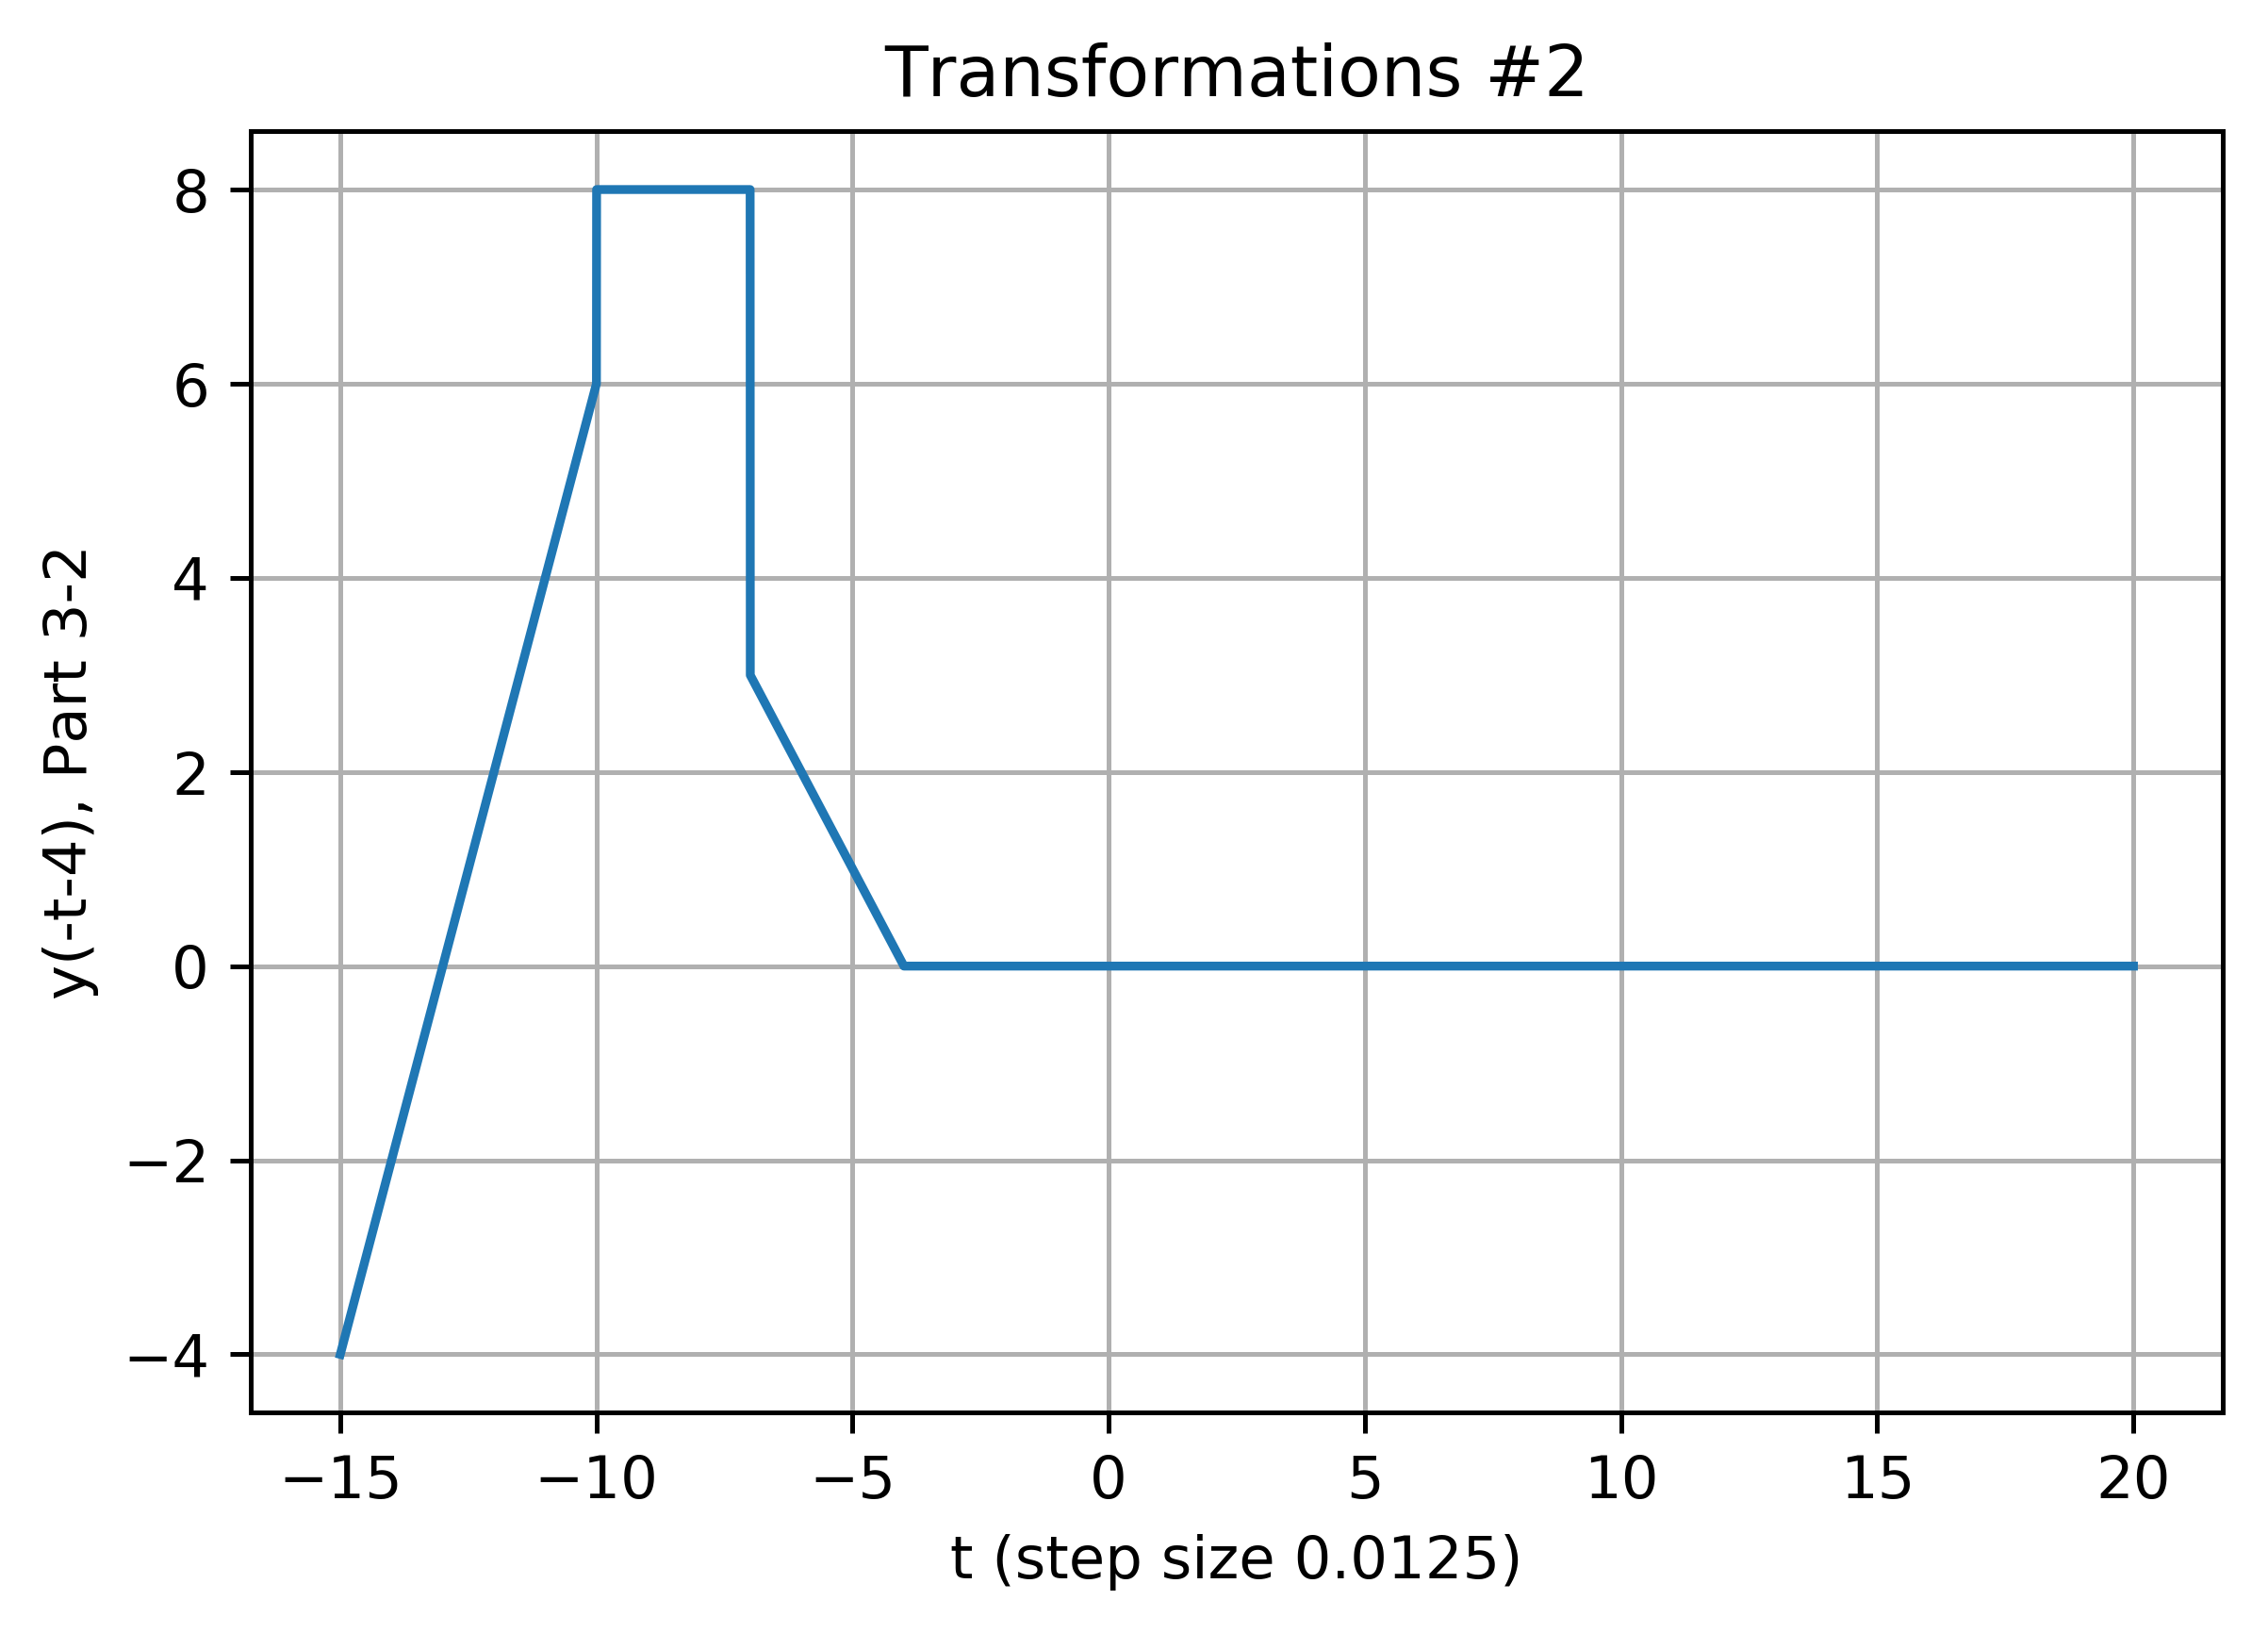

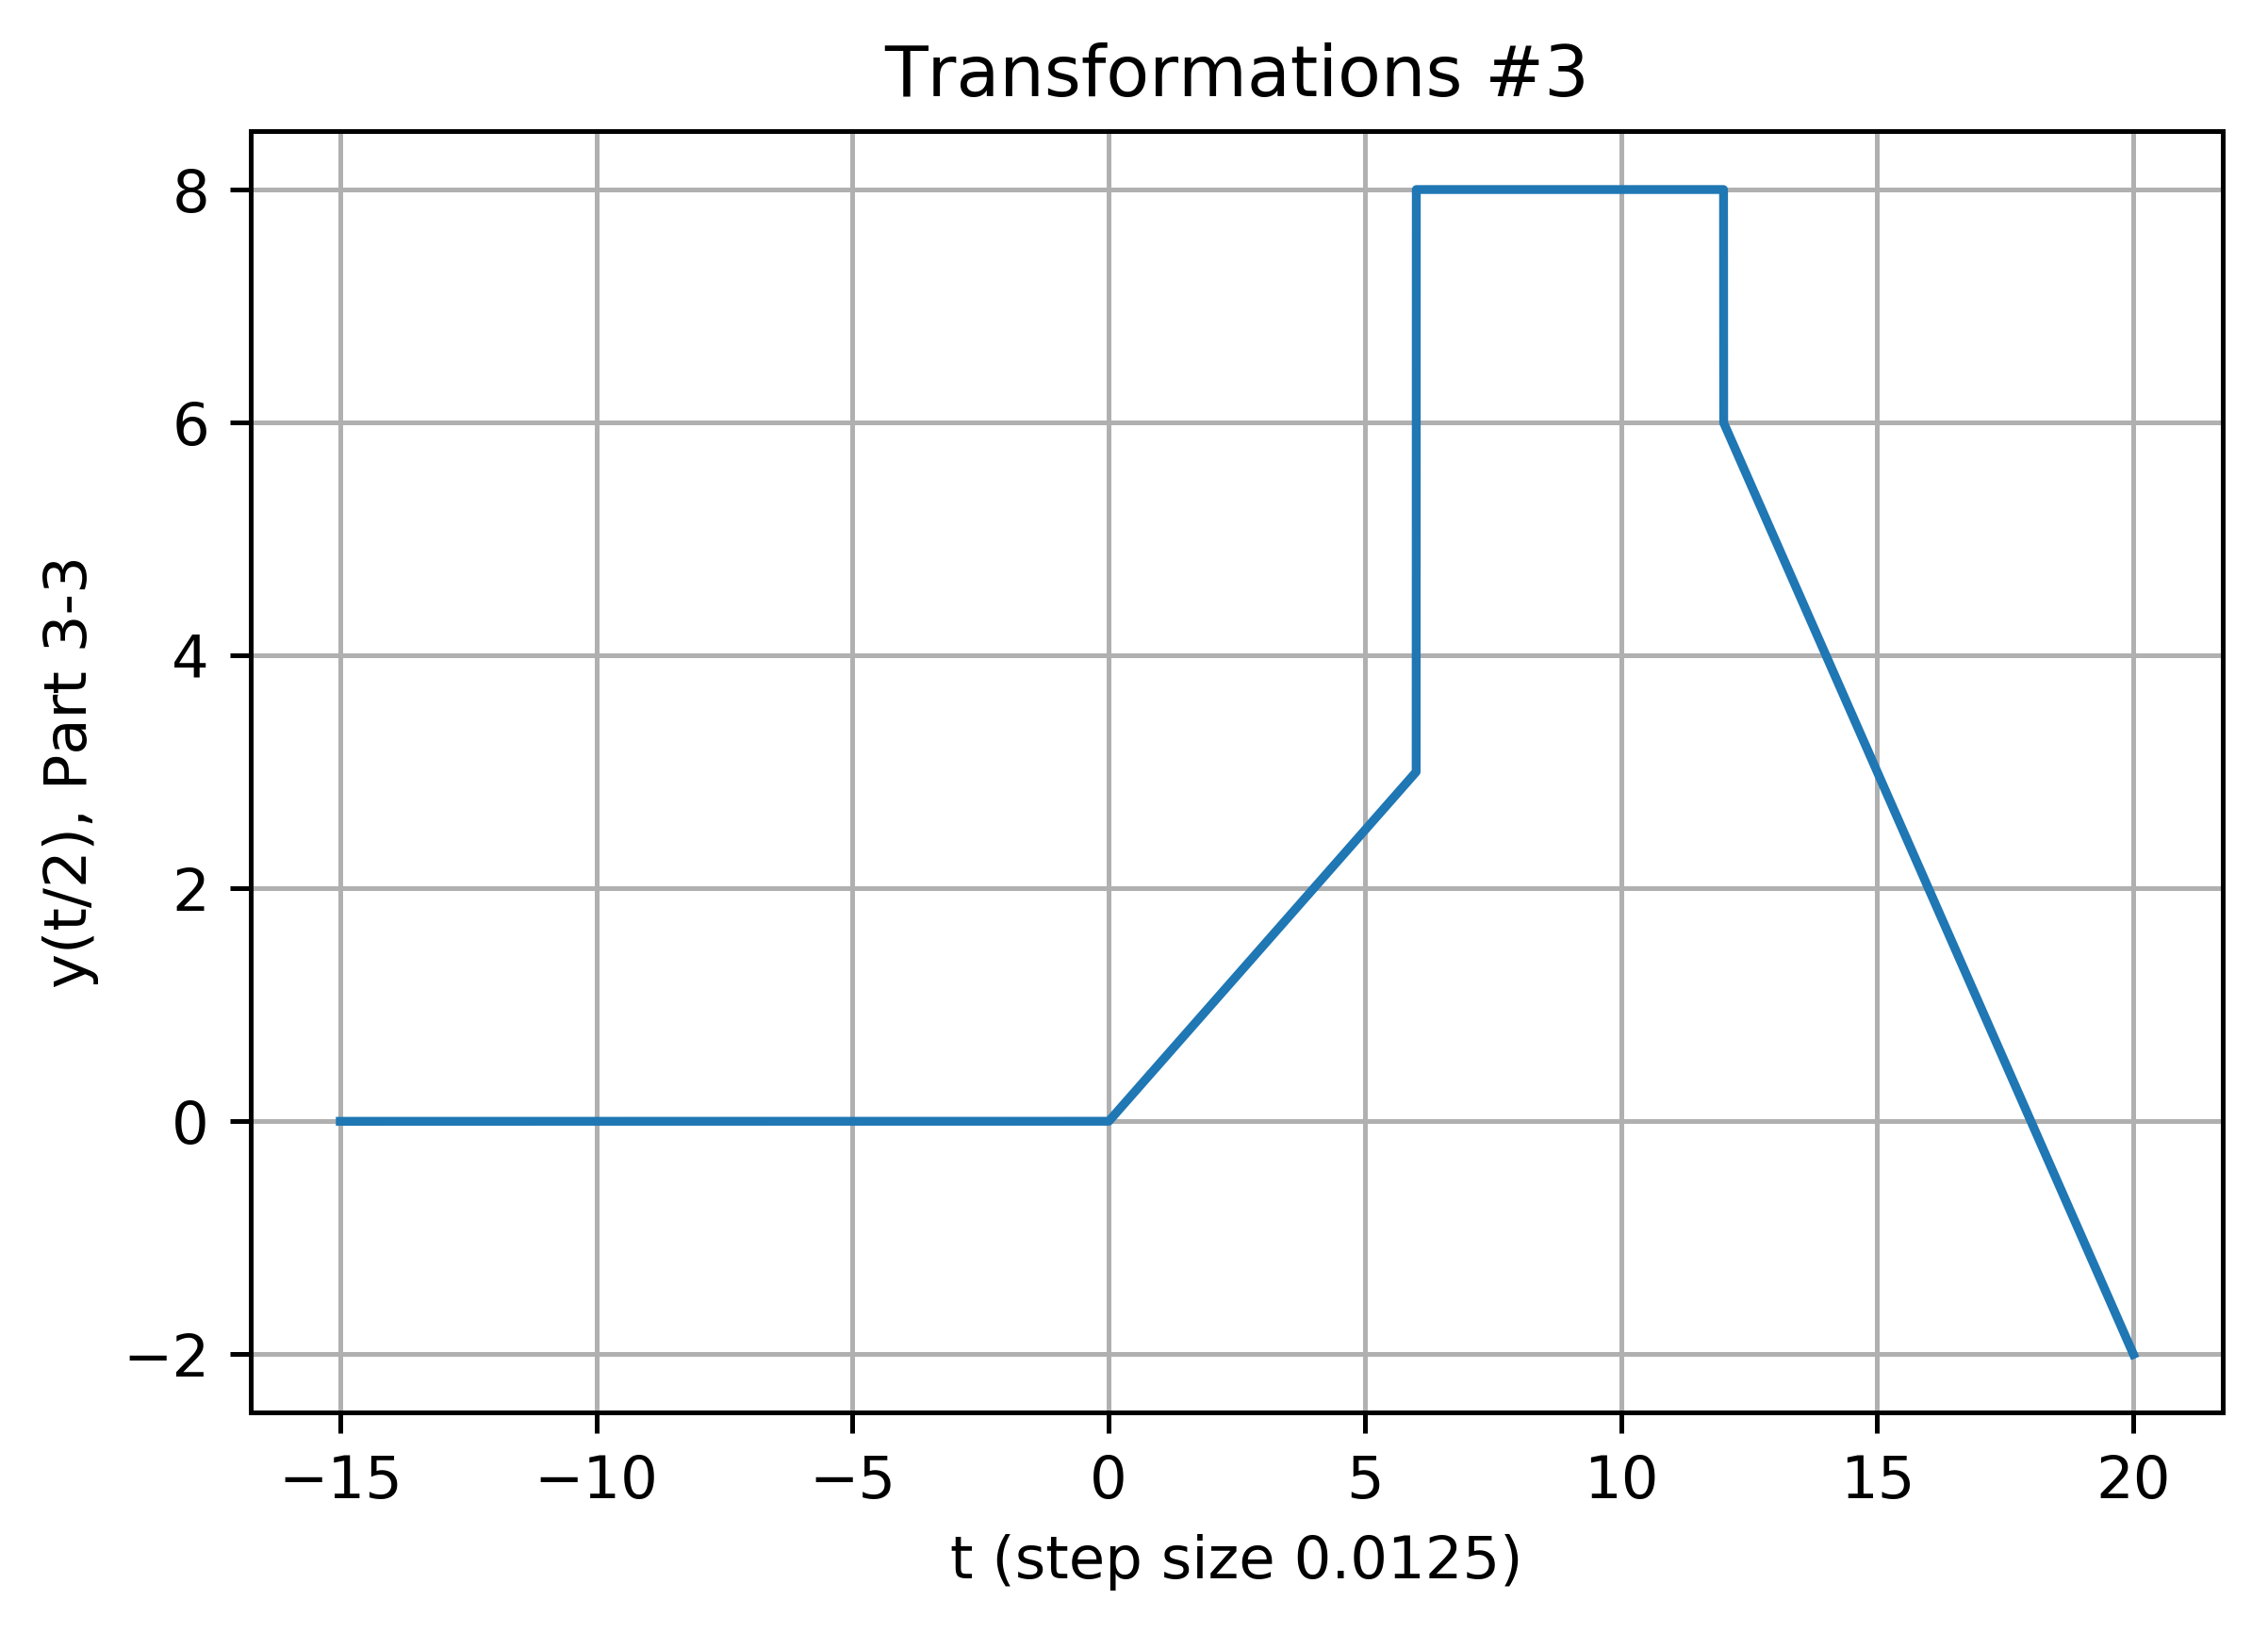

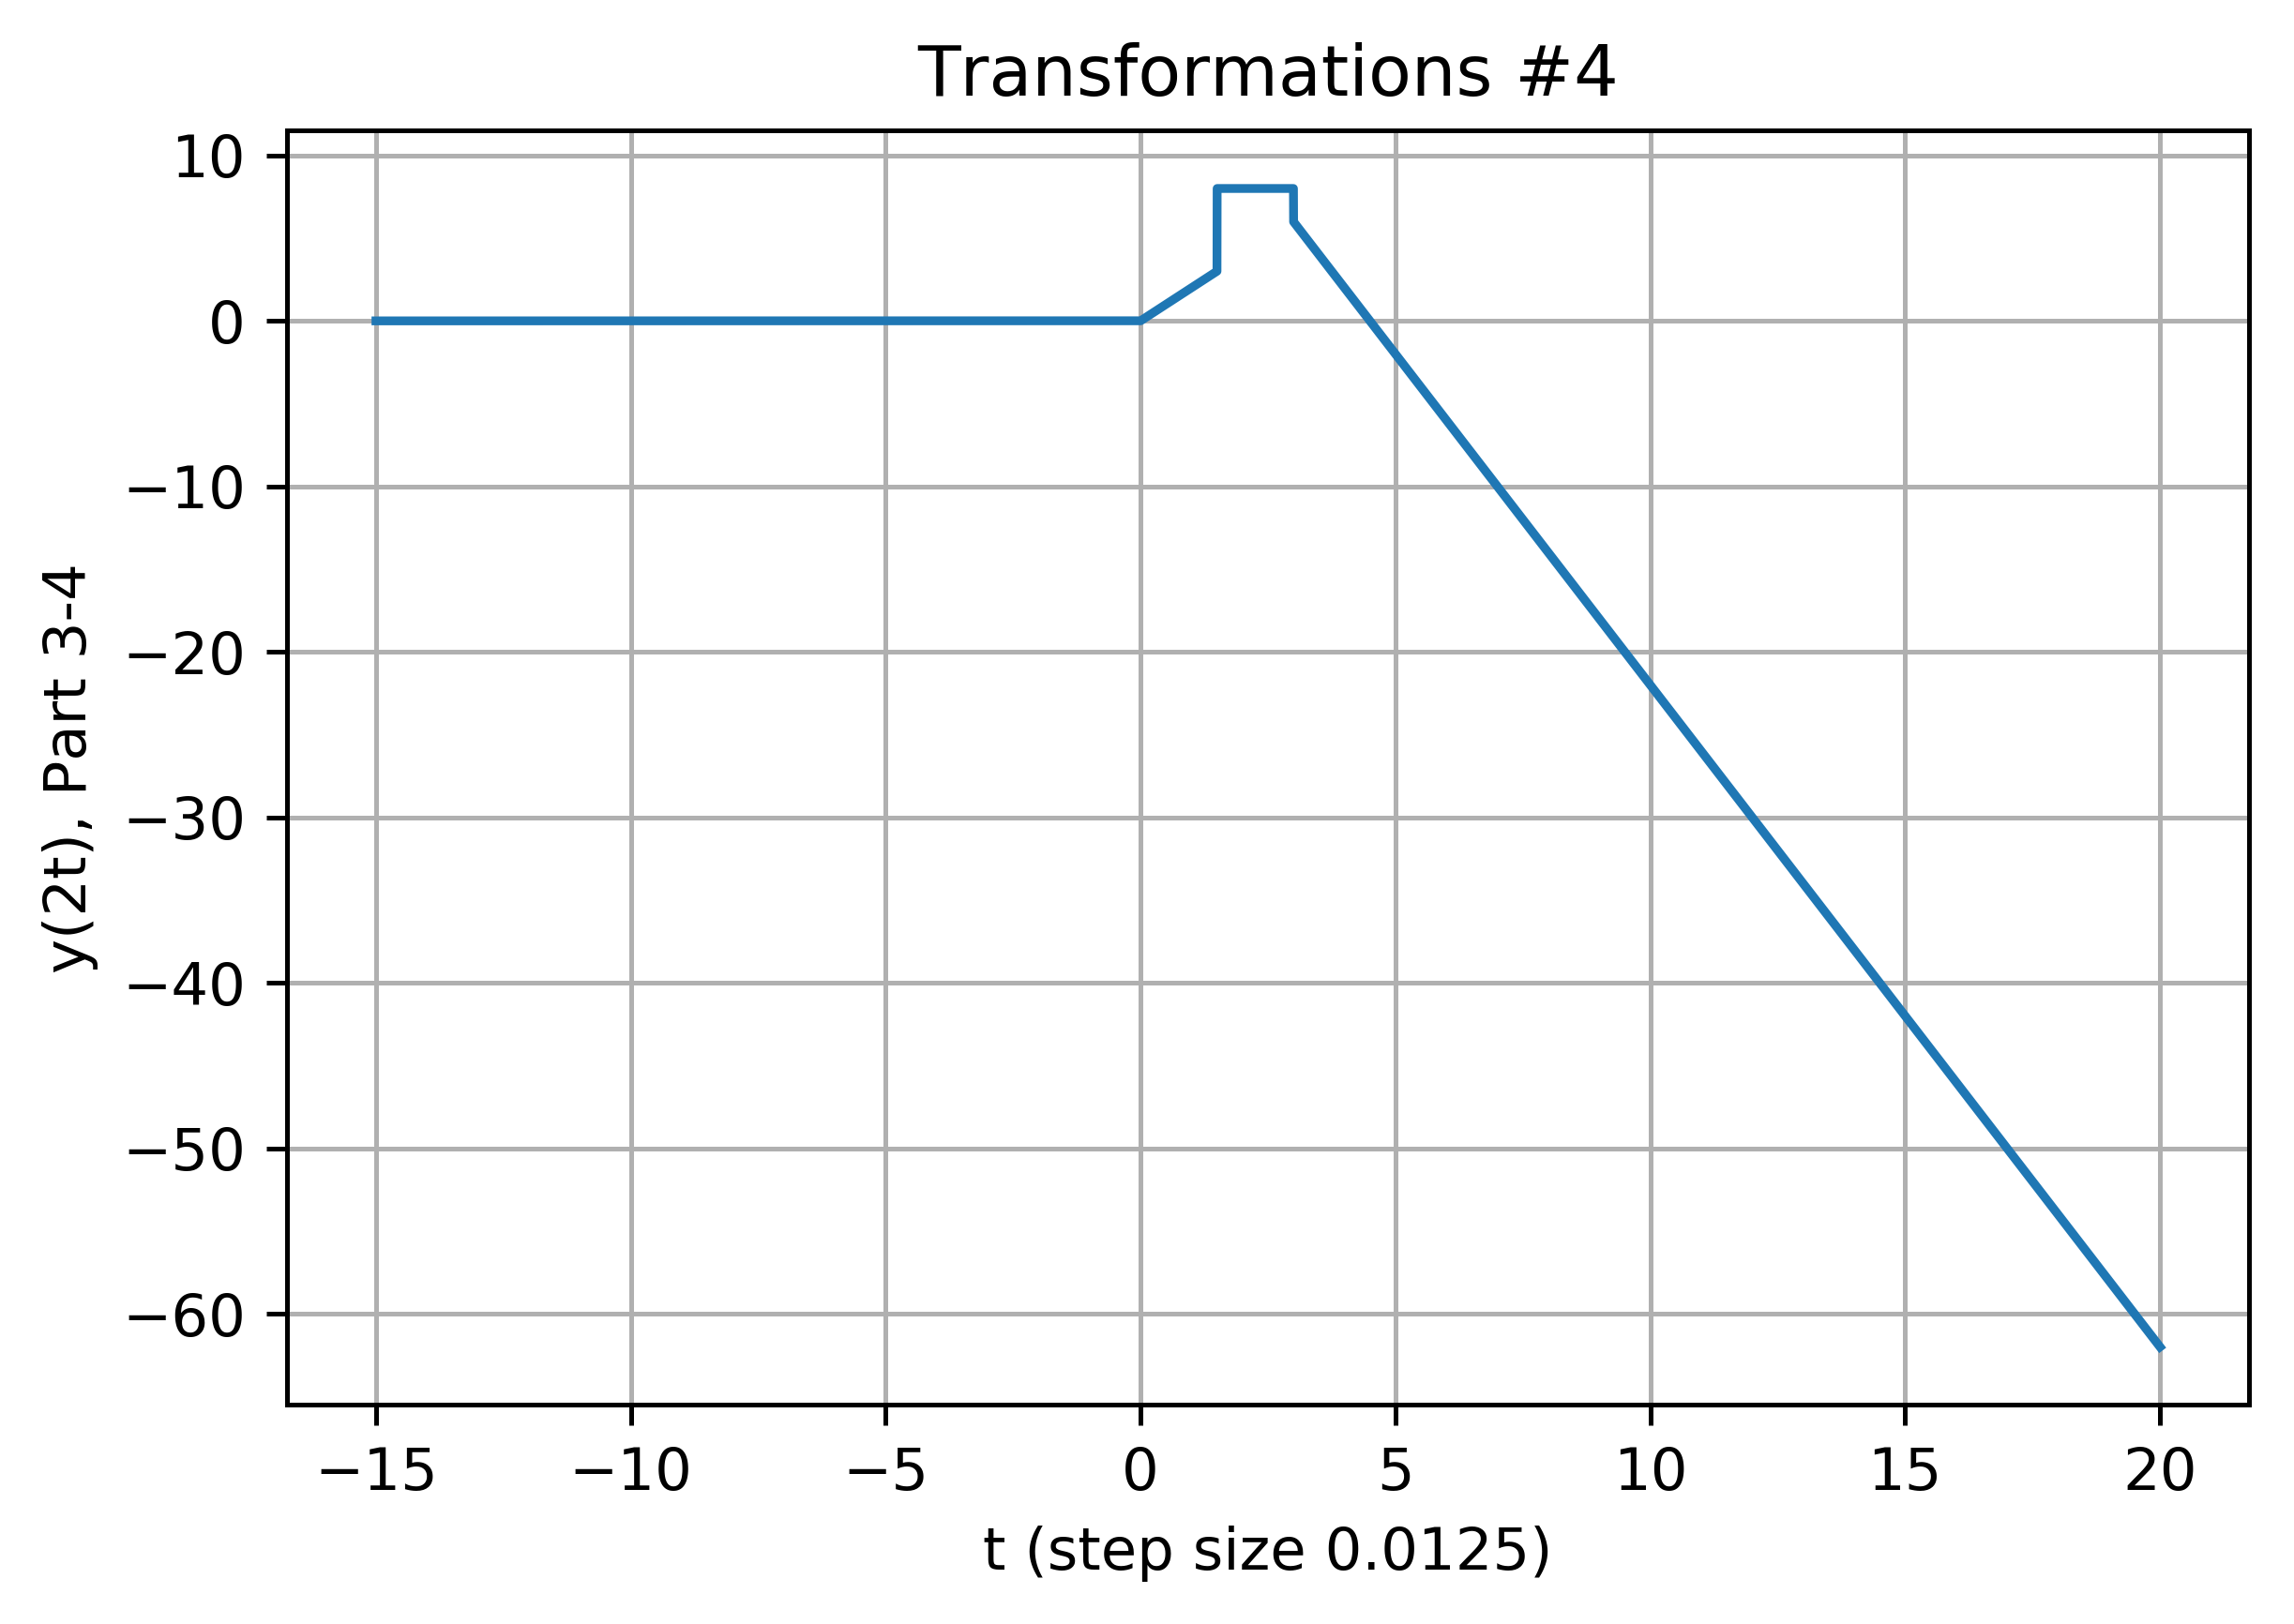

In [143]:
step_size_3 = 0.001
t_3 = np.arange(-15, 20 + step_size_3, step_size_3)

y_3_0 = user_function(np.multiply(t_3, -1))
create_plot(t_3, y_3_0, "t (step size 0.0125)", "y(-t), Part 3-0",
    "Transformations #0")

y_3_1 = user_function(np.subtract(t_3, 4))
create_plot(t_3, y_3_1, "t (step size 0.0125)", "y(t-4), Part 3-1",
    "Transformations #1")

y_3_2 = user_function(np.subtract(np.multiply(t_3, -1.0), 4))
create_plot(t_3, y_3_2, "t (step size 0.0125)", "y(-t-4), Part 3-2",
    "Transformations #2")

y_3_3 = user_function(np.divide(t_3, 2.0))
create_plot(t_3, y_3_3, "t (step size 0.0125)", "y(t/2), Part 3-3",
    "Transformations #3")

y_3_4 = user_function(np.multiply(t_3, 2.0))
create_plot(t_3, y_3_4, "t (step size 0.0125)", "y(2t), Part 3-4",
    "Transformations #4")

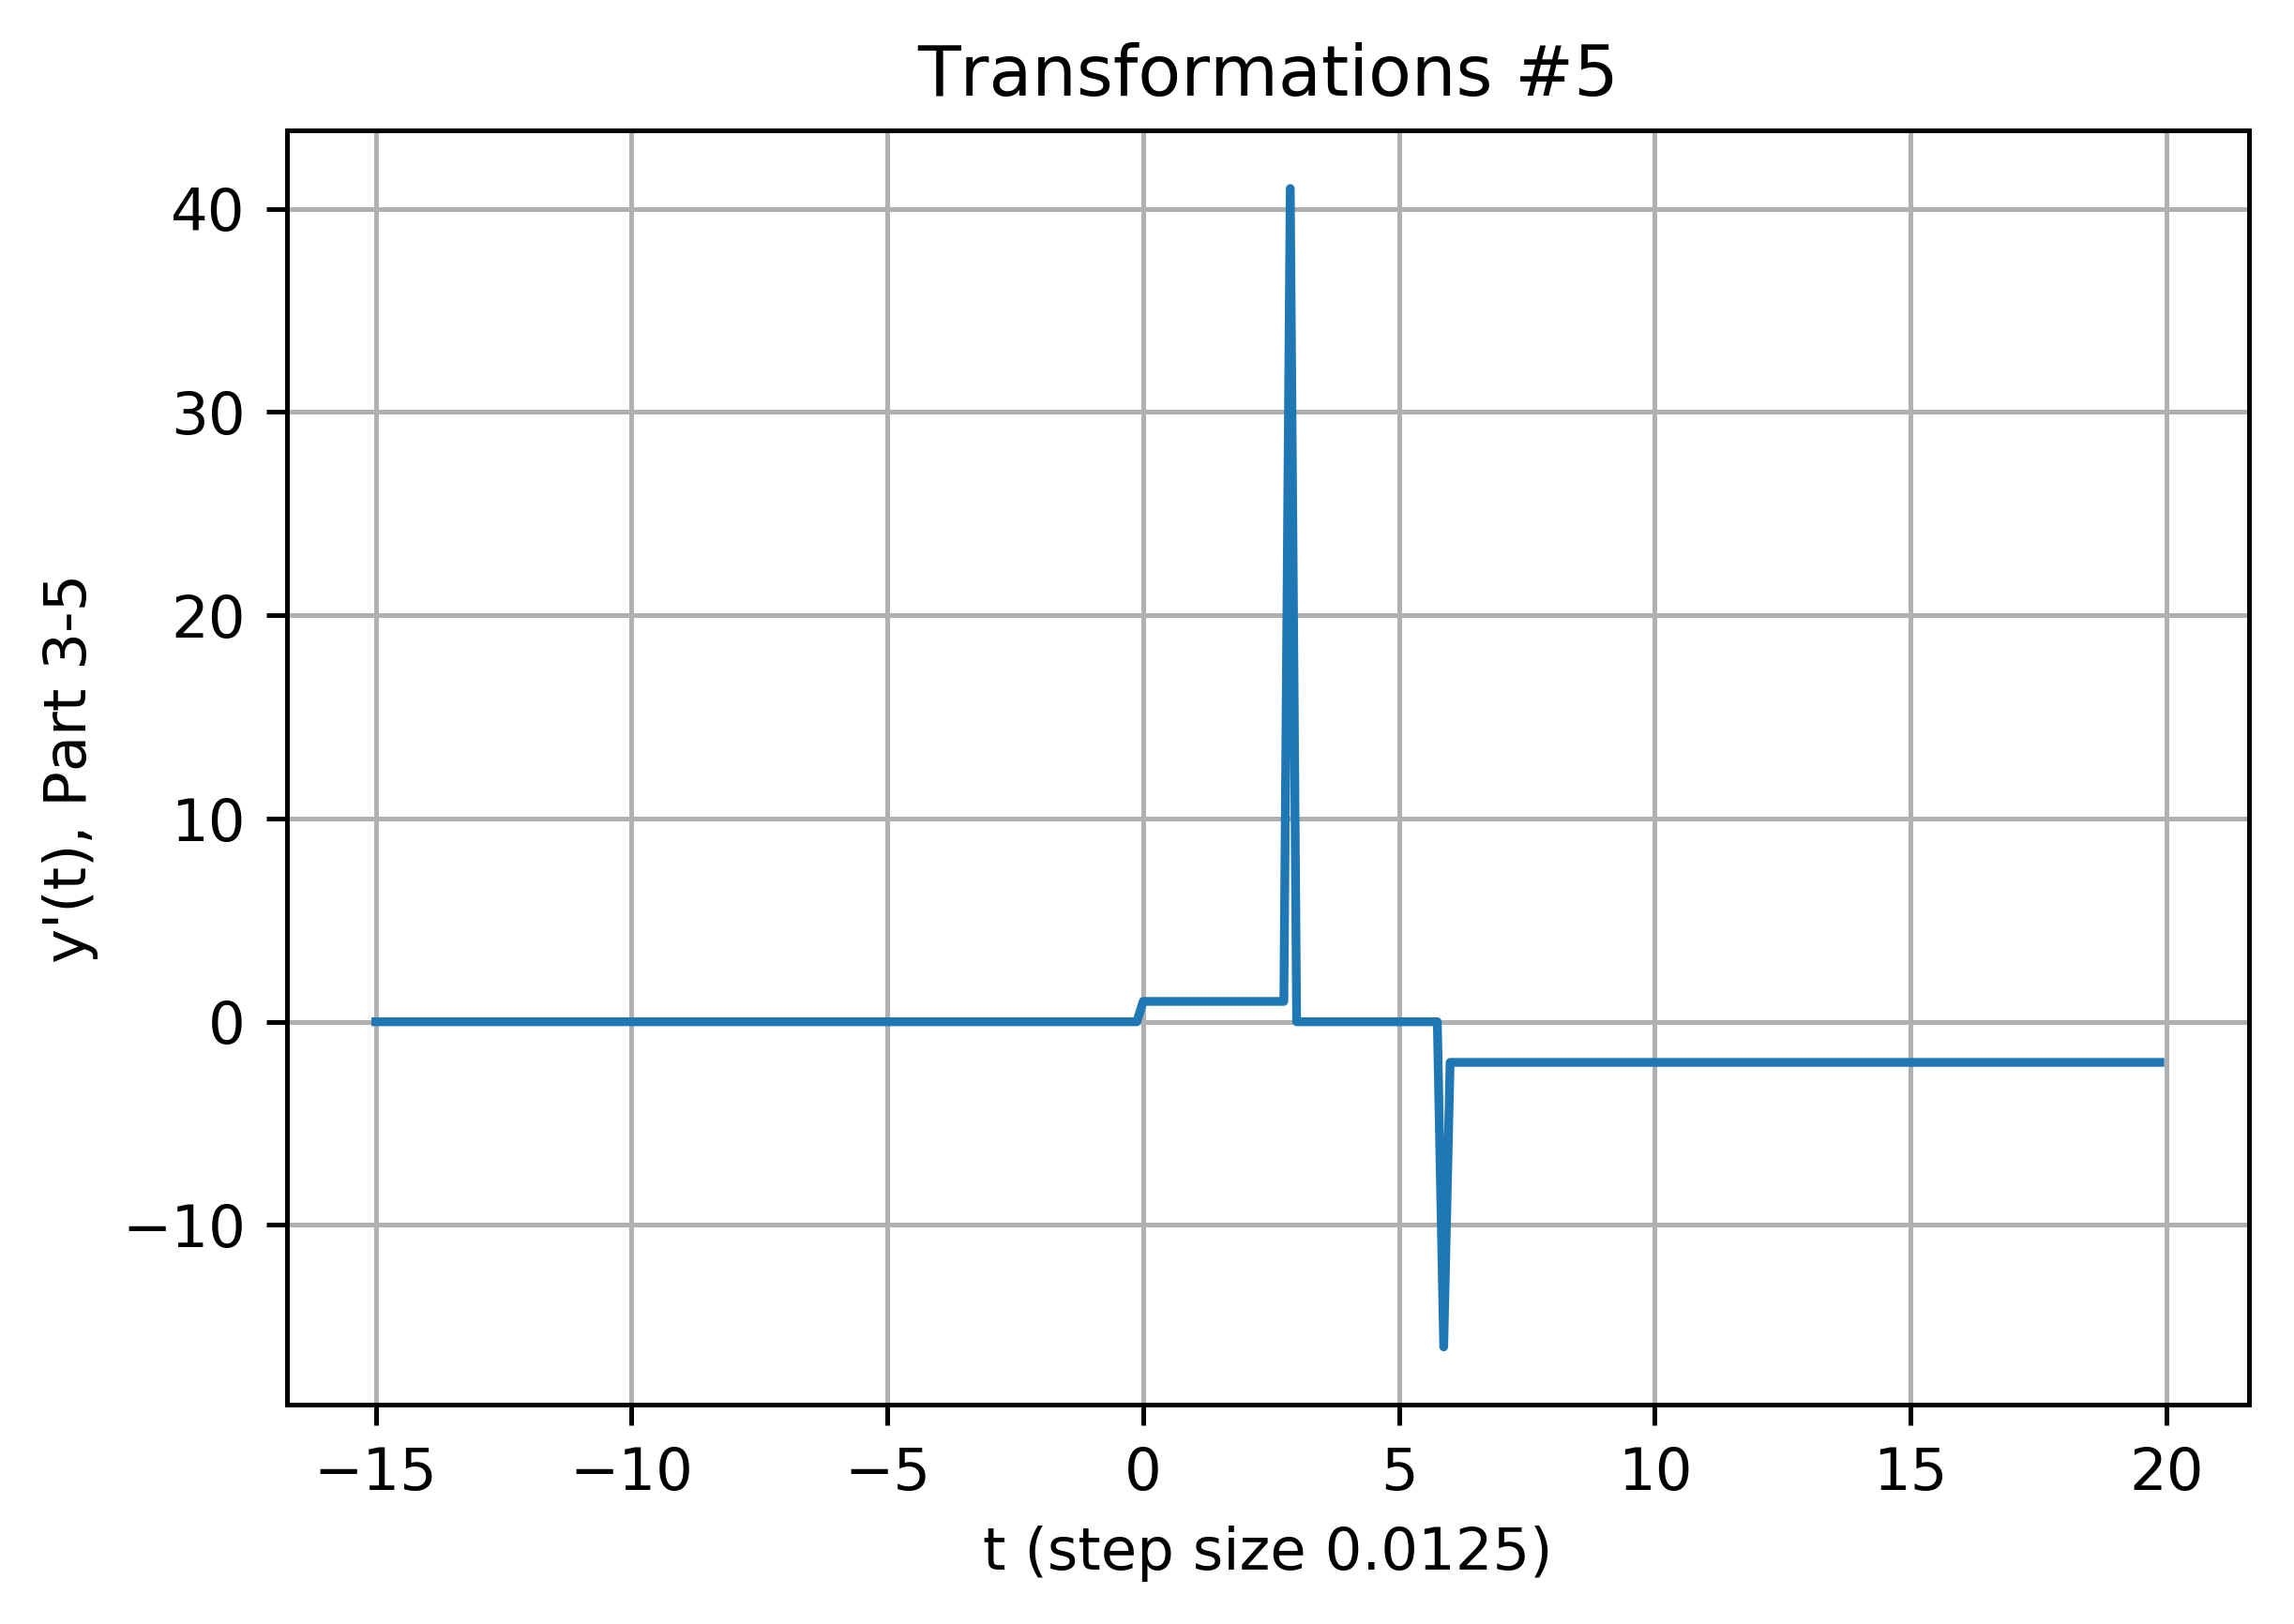

In [141]:
y_3_5 = user_function(t_3)
create_plot(t_3[:-1], np.diff(y_3_5)/np.diff(t_3), "t (step size 0.0125)",
    "y'(t), Part 3-5", "Transformations #5")

## Questions
1. The plots from part 3, tasks 4 and 5 are quite close to eachother. This is in part due to the fact that the function itself, $y(t)$, is defined in steps and not a 'continuous' set of values to differentiate along. This results in the transitions between the step and ramp functions being discontinuous and computationally very large numbers when a derivative is attempted to be computed.
2. As the step size for the t function (the variable we're differentiating by) decreases, the function's spikes at the two discontinuous points become greater and greater. This is because the $\Delta x$ values become _so small_, that the fraction $\frac{\Delta y}{\Delta x}$ becomes an increasingly large number. For example, when I tested a step size of 0.0125, the peak at those discontinuities was ~400.
3. I think this lab was exceptionally clear and direct in both its expectations and tasks.

## Conclusion
This lab showed how easy it is to implement a lot of the fundamental functions for signals and systems analysis. Once those very simple functions are defined, shifting, scaling, reversal, and differentiation is all trivial using these kinds of function definitions.

The differentiation of these functions does lead to unexpected results, but logically it makes sense that the built-in numpy methods aren't able to deal with discontinuities.

## Attachments
![Hand Drawn Differentiation](Hand Plot.jpeg)

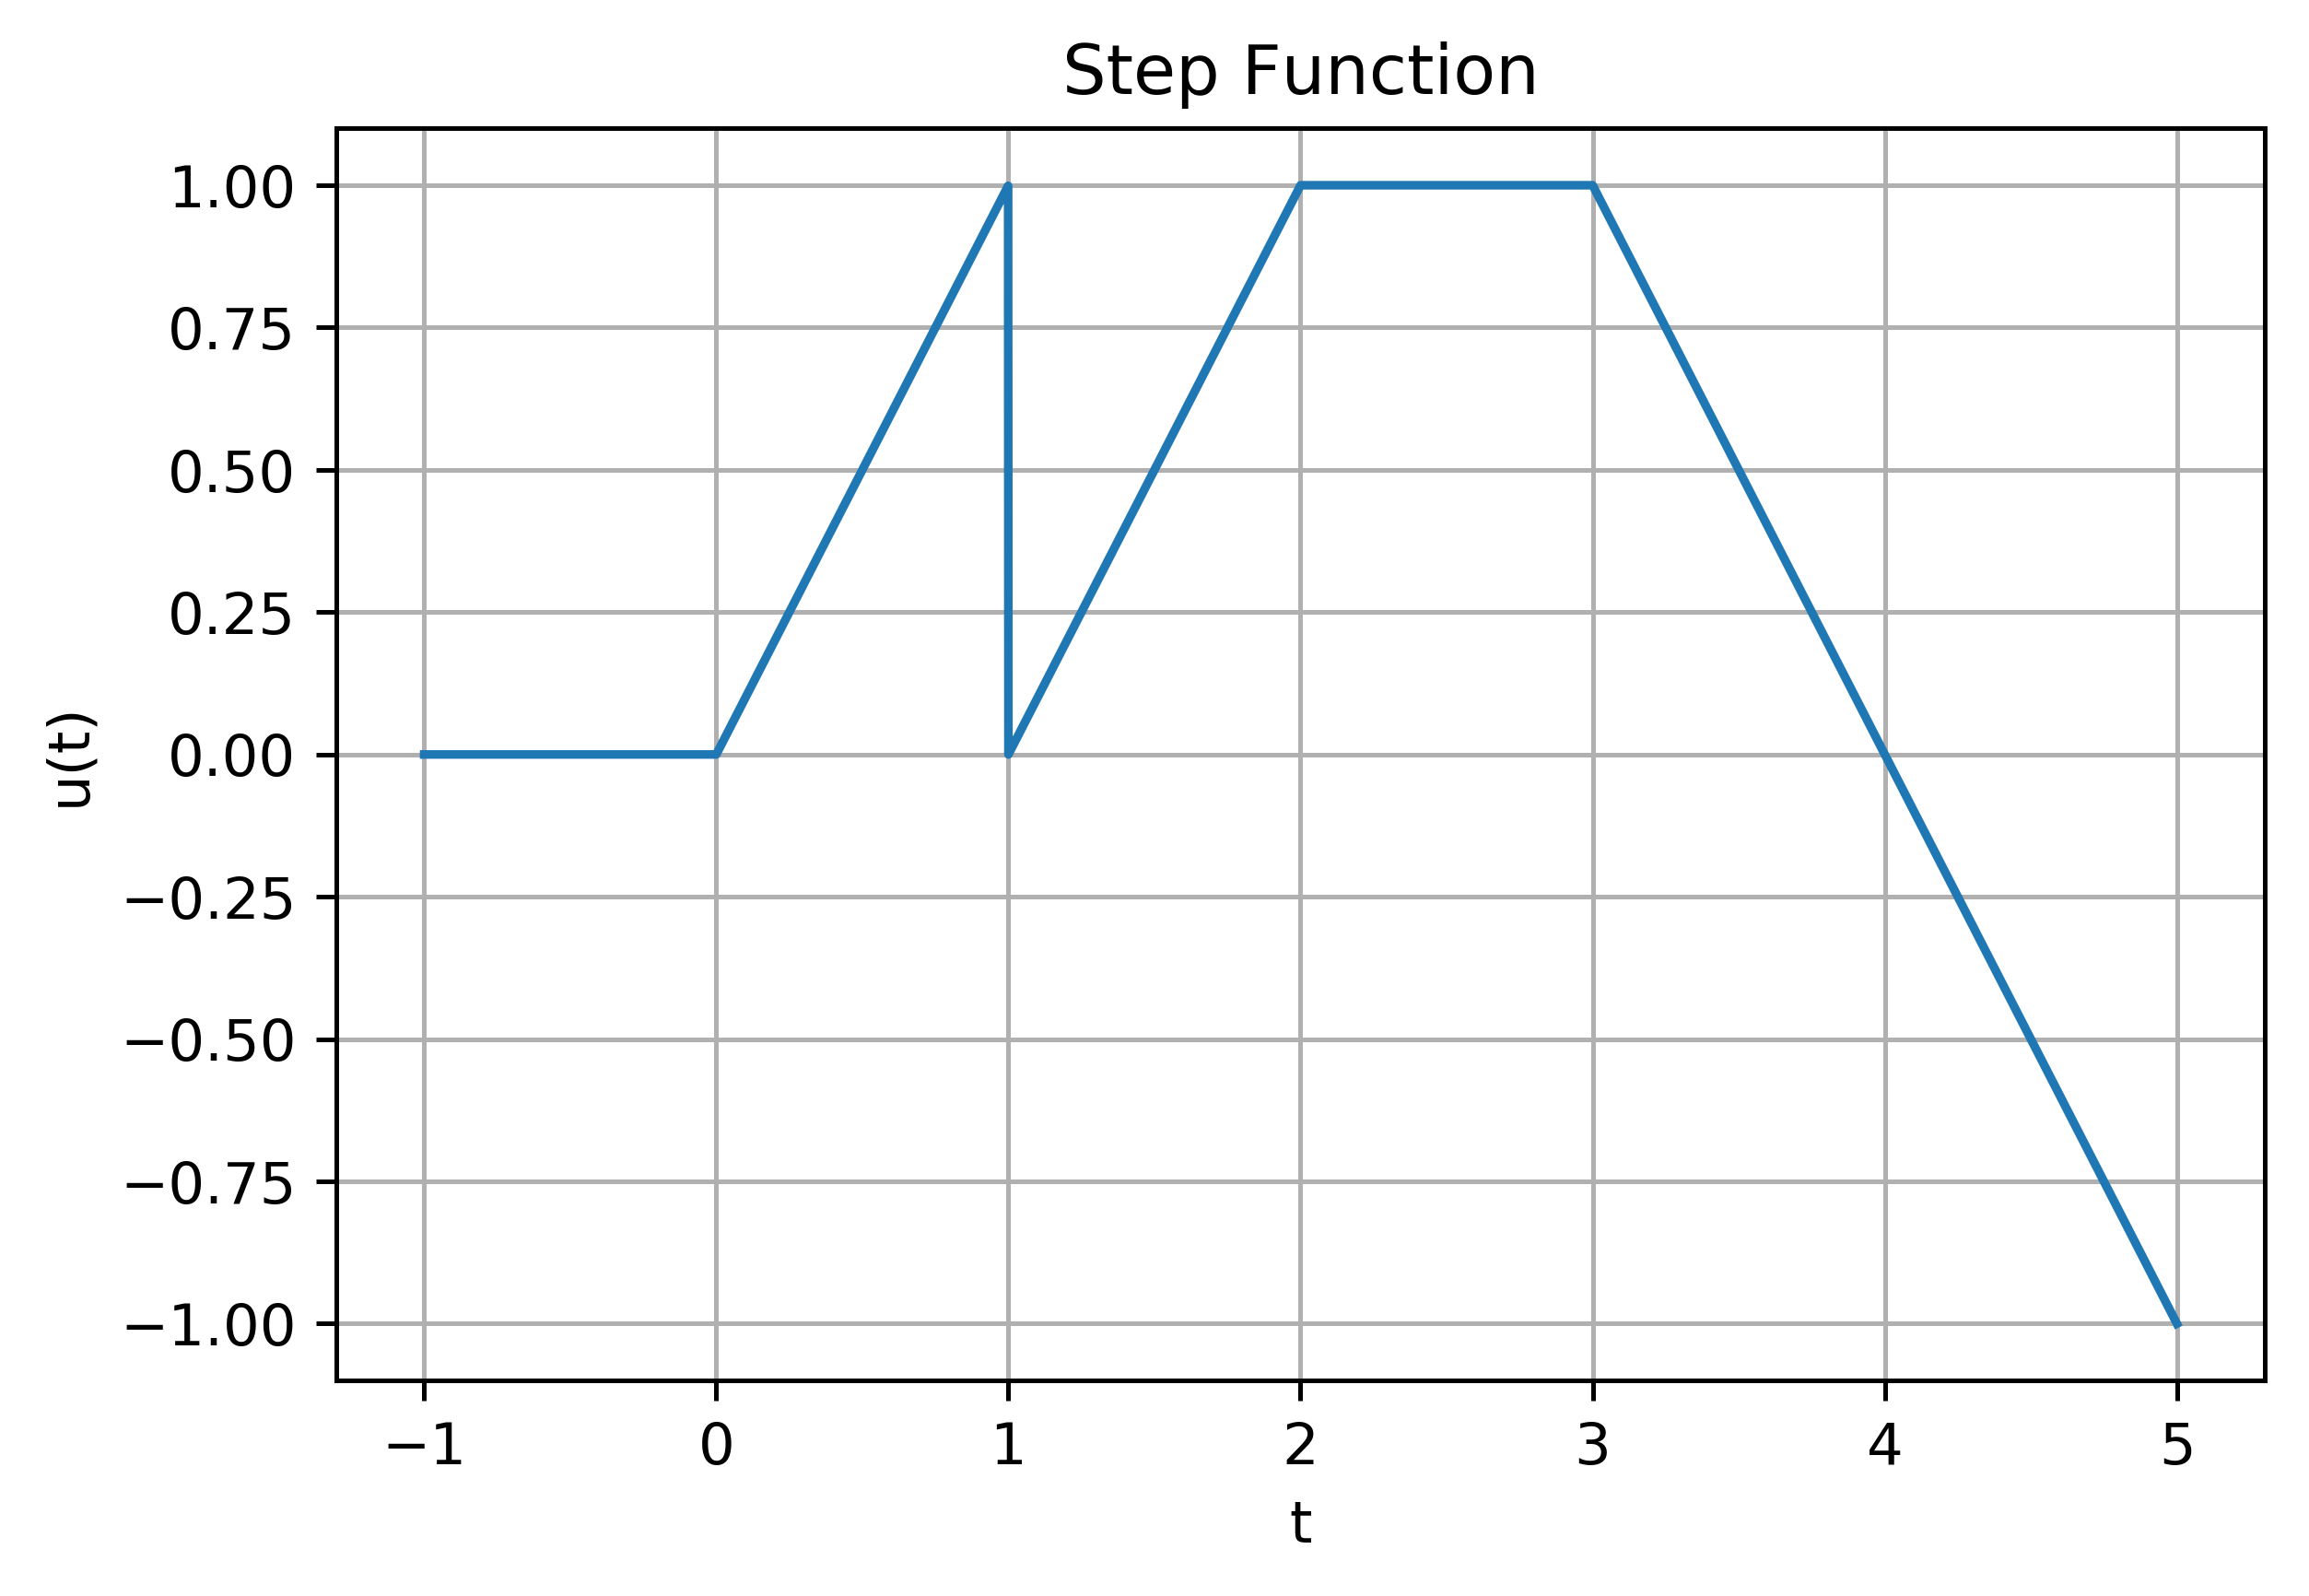

In [9]:
def hw(t):
    return (r(t)-u(t, 1)-r(t, 2)-r(t, 3))
step_size_hw = .001
t_hw = np.arange(-1, 5 + step_size_hw, step_size_hw)
y_hw = hw(t_hw)

create_plot(t_hw, y_hw, "t", "u(t)", "Step Function")